# Credit EDA Assignment


### Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

In [1]:
#importing all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd                                                                                          

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the application_data.csv dataset
in1=pd.read_csv("/Users/amalajith/Downloads/application_data.csv")
in1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#to display all the columns and rows instead of a summary
pd.set_option('display.max_columns',None,'display.max_rows',None)
in1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
#checking the shape of dataframe
in1.shape

(307511, 122)

In [6]:
#Checking structure of the data
in1.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
#Checking statistical summary for numerical variables
in1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
#As there are scientific notations present in the data lets convert them into float
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [9]:
in1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

### Data Cleaning of application_dataset

In [10]:
#Checking for null values in the application dataset
in1.isnull().values.any()

True

In [11]:
#Finding the count of null values in each column
in1.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
#Finding the percentage of null values in each column
(in1.isnull().mean()*100).sort_values(ascending=False)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_AVG        69.43
NONLIVINGAPARTMENTS_MEDI       69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
LIVINGAPARTMENTS_MEDI          68.35
FLOORSMIN_AVG                  67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_MEDI                 67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_MODE               66.50
YEARS_BUILD_AVG                66.50
OWN_CAR_AGE                    65.99
LANDAREA_MEDI                  59.38
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MODE             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MEDI             55.18
E

##### Removing columns that contains 50% and above missing data for application dataset

In [13]:
#Making a list of all the missing values in the data and dropping it
del_cols=["OWN_CAR_AGE", "EXT_SOURCE_1", "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"]
in1.drop(del_cols,axis=1,inplace=True)

In [14]:
#Verifying whether all mentioned columns are dropped
in1.shape

(307511, 81)

In [15]:
#sorting the missing value percentage in ascending order
(in1.isnull().mean()*100).sort_values(ascending=False)

FLOORSMAX_AVG                  49.76
FLOORSMAX_MODE                 49.76
FLOORSMAX_MEDI                 49.76
YEARS_BEGINEXPLUATATION_AVG    48.78
YEARS_BEGINEXPLUATATION_MODE   48.78
YEARS_BEGINEXPLUATATION_MEDI   48.78
TOTALAREA_MODE                 48.27
EMERGENCYSTATE_MODE            47.40
OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
NAME_TYPE_SUITE                 0.42
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
AMT_ANNUITY                     0.00
CNT_FAM_MEMBERS                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_OWN_CAR                    0.00
F

In [16]:
in1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,306851.00,246546.00,157504.00,154491.00,157504.00,154491.00,157504.00,154491.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.51,0.51,0.98,0.23,0.98,0.22,0.98,0.23,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.19,0.19,0.06,0.14,0.06,0.14,0.06,0.15,0.11,2.40,0.45,2.38,0.36,826.81,0.01,0.45,0.01,0.12,0.28,0.01,0.27,0.06,0.00,0.06,0.00,0.06,0.05,0.03,0.10,0.02,0.09,0.02,0.02,0.02,0.08,0.11,0.20,0.92,0.79,1.87
min,100002.00,0.00,0.00,25650.00,45000.00,1615.50,40500.00,0.00,-25229.00,-17912.00,-24672.00,-7197.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4292.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,189145.50,0.00,0.00,112500.00,270000.00,16524.00,238500.00,0.01,-19682.00,-2760.00,-7479.50,-4299.00,1.00,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.37,0.98,0.17,0.98,0.17,0.98,0.17,0.04,0.00,0.00,0.00,0.00,-1570.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,278202.00,0.00,0.00,147150.00,513531.00,24903.00,450000.00,0.02,-15750.00,-1213.00,-4504.00,-3254.00,1.00,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.54,0.98,0.17,0.98,0.17,0.98,0.17,0.07,0.00,0.00,0.00,0.00,-757.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,367142.50,0.00,1.00,202500.00,808650.00,34596.00,679500.00,0.03,-12413.00,-289.00,-2010.0

### Missing Value Treatment and Outlier Analysis for Application Dataset

#### Analysis of AMT_GOODS_PRICE(For consumer loans it is the price of the goods for which the loan is given)

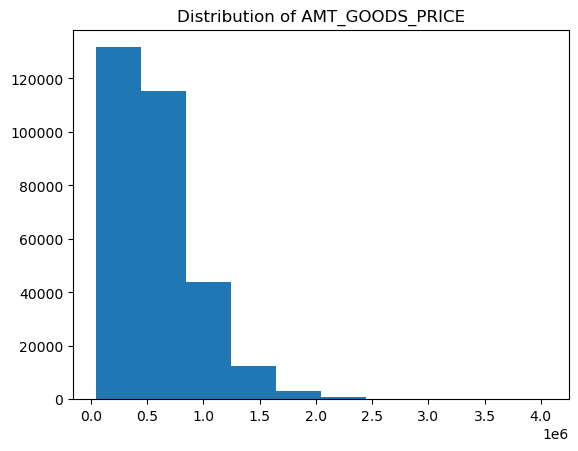

In [17]:
##Plotting the distribution of AMT_GOODS_PRICE 
plt.hist(in1["AMT_GOODS_PRICE"])
plt.title("Distribution of AMT_GOODS_PRICE")
plt.show()

In [18]:
#Looking for summary of the column
in1['AMT_GOODS_PRICE'].describe()

count    307233.00
mean     538396.21
std      369446.46
min       40500.00
25%      238500.00
50%      450000.00
75%      679500.00
max     4050000.00
Name: AMT_GOODS_PRICE, dtype: float64

In [19]:
#Finding the total number of null values in AMT_GOODS_PRICE
in1["AMT_GOODS_PRICE"].isnull().sum()

278

In [20]:
#Finding the median of AMT_GOODS_PRICE
in1["AMT_GOODS_PRICE"].median()

450000.0

In [21]:
#replacing the missing values in AMT_GOODS_PRICE with the median value
in1["AMT_GOODS_PRICE"]=in1["AMT_GOODS_PRICE"].fillna(in1["AMT_GOODS_PRICE"].median())
in1["AMT_GOODS_PRICE"].isnull().sum()

0

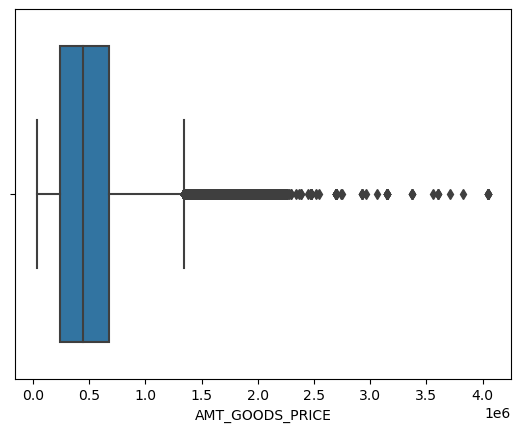

In [22]:
#Checking the spread of the data and also for outliers
sns.boxplot(x=in1.AMT_GOODS_PRICE)
plt.show()

In [23]:
in1.AMT_GOODS_PRICE.quantile([0.5,0.7,0.8,0.85,0.9,0.95,0.99])

0.50    450000.00
0.70    675000.00
0.80    814500.00
0.85    900000.00
0.90   1093500.00
0.95   1305000.00
0.99   1800000.00
Name: AMT_GOODS_PRICE, dtype: float64

In [24]:
#Calculating IQR (Inter Quartile range)
Q1 = in1['AMT_GOODS_PRICE'].quantile(0.25)
Q3 = in1['AMT_GOODS_PRICE'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

441000.0


Values before (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) are outliers

In [25]:
Minval=Q1-1.5*IQR
Maxval=Q1+1.5*IQR

In [26]:
print("Min value before which outlier exist: {}".format(Minval))
print("Max value after which outlier exist: {}".format(Maxval))

Min value before which outlier exist: -423000.0
Max value after which outlier exist: 900000.0


##### Observation

Values above 900000.0 are outliers but as per the problem statement we need not make any changes.

#### Analysis of AMT ANNUITY(Loan Annuity)

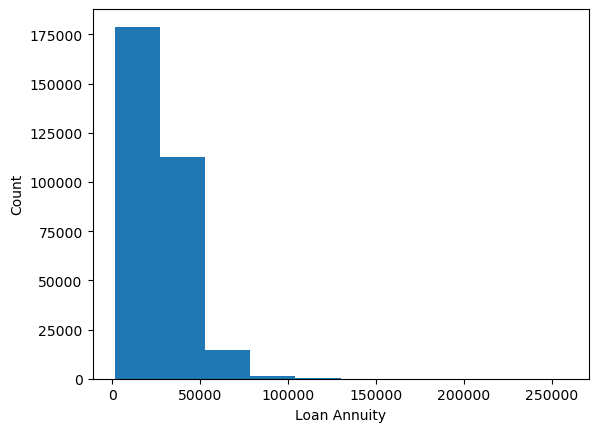

In [27]:
##Plotting the distribution of AMT_ANNUITY 
plt.hist(in1["AMT_ANNUITY"])
plt.xlabel("Loan Annuity")
plt.ylabel("Count")
plt.show()

Most of values lies between 0 to 50000.

In [28]:
#Checking the number of missing values
in1.AMT_ANNUITY.isna().sum()

12

In [29]:
in1["AMT_ANNUITY"].describe()

count   307499.00
mean     27108.57
std      14493.74
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

In [30]:
#as all the values lies close to the median value we replace the null values with median value
in1["AMT_ANNUITY"]=in1.AMT_ANNUITY.fillna(in1.AMT_ANNUITY.median())

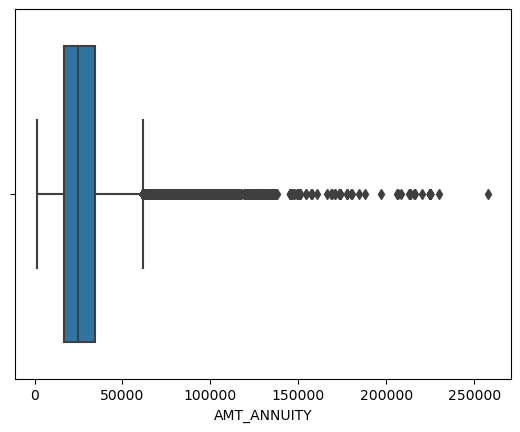

In [31]:
#Checking the spread of the data and also for outliers
sns.boxplot(x=in1.AMT_ANNUITY)
plt.show()

In [32]:
in1.AMT_ANNUITY.quantile([0.5,0.7,0.8,0.85,0.9,0.95,0.99])

0.50   24903.00
0.70   32004.00
0.80   37516.50
0.85   40806.00
0.90   45954.00
0.95   53325.00
0.99   70006.50
Name: AMT_ANNUITY, dtype: float64

In [33]:
#Calculating IQR (Inter Quartile range)
Q1 = in1['AMT_ANNUITY'].quantile(0.25)
Q3 = in1['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

18072.0


In [34]:
Minval=Q1-1.5*IQR
Maxval=Q1+1.5*IQR

In [35]:
print("Min value before which outlier exist: {}".format(Minval))
print("Max value after which outlier exist: {}".format(Maxval))

Min value before which outlier exist: -10584.0
Max value after which outlier exist: 43632.0


##### Observation

We can see that there are outliers present above 43632 in the column but as per the problem statement we need not make any changes.

In [36]:
in1.AMT_ANNUITY.isna().sum()

0

#### Analysis of NAME_TYPE_SUITE (who was accompanying client when he was applying for the loan)

In [37]:
in1["NAME_TYPE_SUITE"].isnull().sum()

1292

In [38]:
in1["NAME_TYPE_SUITE"].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [39]:
in1["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [40]:
#As most of the values falls under Unaccompanied category we can fill the missing values with it
in1["NAME_TYPE_SUITE"] = in1["NAME_TYPE_SUITE"].fillna("Unaccompanied")

In [41]:
in1.NAME_TYPE_SUITE.isnull().sum()

0

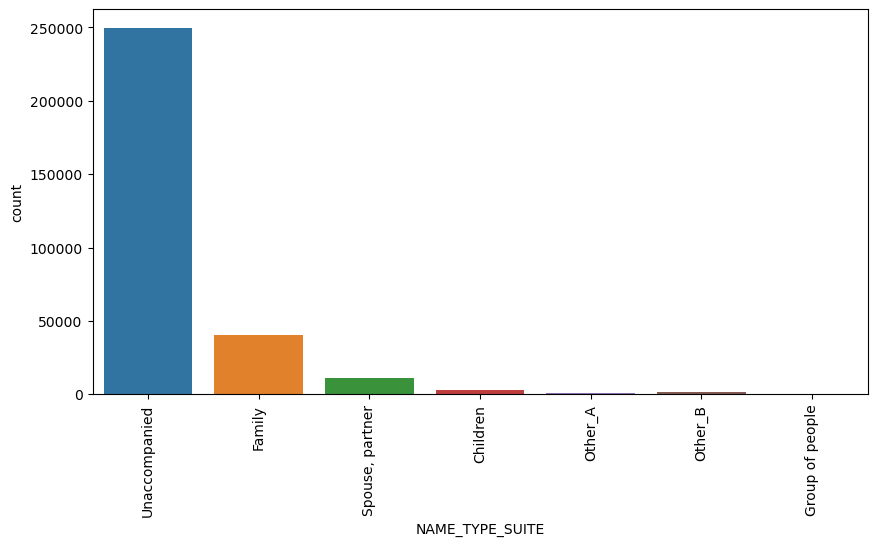

In [42]:
#Plotting countplot for NAME_TYPE_SUITE
plt.figure(figsize = (10,5))
sns.countplot(data = in1, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

##### Observation

From the above plot it is clear the majority of the clients came alone for applying for the loan.

In [43]:
in1.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                          0
AMT_GOODS_PRICE                      0
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

#### Analysis of OCCUPATION_TYPE(what kind of occupation does the client have)

In [44]:
in1.OCCUPATION_TYPE.describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [45]:
in1["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [46]:
in1["OCCUPATION_TYPE"].isna().sum()

96391

In [47]:
#As there are a lot of null values in the OCCUPATION_TYPE we add it to another new category named Unknown
in1['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

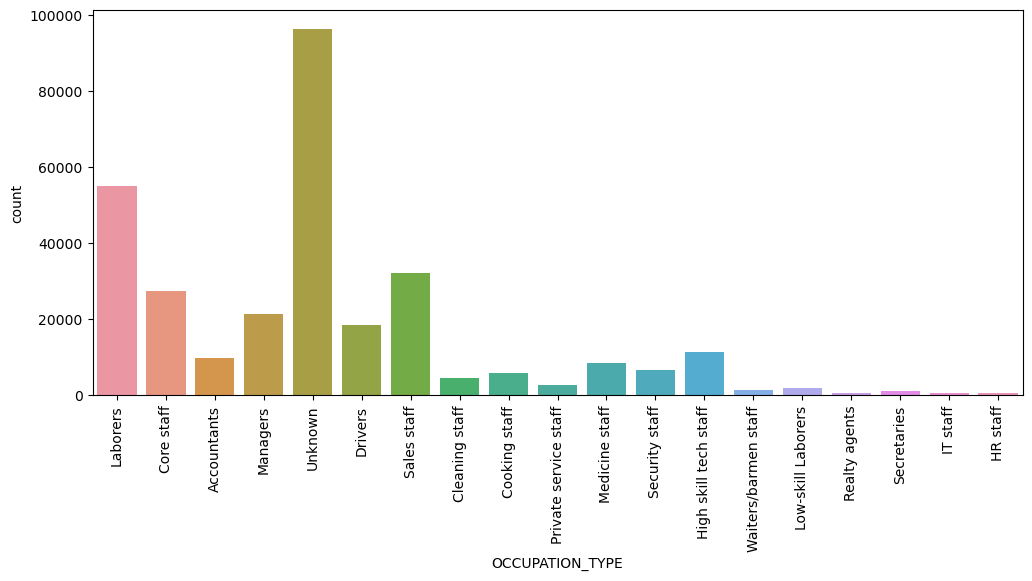

In [48]:
#Plotting the column dats using countplot to understand the distribution of data
plt.figure(figsize = (12,5))
sns.countplot(data = in1, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

##### Observation

From the above countplot its obvious that occupation of the majority of clients are Labourers and the least is from Realty agents, IT staff and HR Staff.

In [49]:
in1["OCCUPATION_TYPE"].isna().sum()

0

In [50]:
in1.isnull().sum().sort_values()

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_LIVE_REGION           0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
WEEKDAY_APPR_PROCESS_START           0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_2                      0
FLAG_DOCUMENT_3                      0
FLAG_DOCUMENT_4          

#### Analysis of CODE_GENDER (gender of the client)

In [51]:
in1['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

There are columns with gender given as XNA. This can also be considered as null value.

In [52]:
in1[in1['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.00,382500.00,19125.00,337500.00,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.02,-20232,-10044,-10024.00,-3537,1,1,1,1,1,0,Unknown,2.00,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.30,0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-286.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.00,270000.00,13500.00,225000.00,Family,Working,Secondary / secondary special,Married,House / apartment,0.03,-13717,-2797,-2241.00,-4659,1,1,1,1,1,0,Low-skill Laborers,4.00,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.71,0.31,0.98,0.04,0.98,0.04,0.98,0.04,0.01,No,0.00,0.00,0.00,0.00,-493.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,3.00,0.00,4.00
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.00,405000.00,20250.00,225000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.04,-10647,-1228,-183.00,-1671,1,1,1,1,1,0,Core staff,3.00,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.66,0.08,0.99,0.17,0.99,0.17,0.99,0.17,0.08,No,7.00,1.00,7.00,1.00,-851.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.00
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.00,540000.00,27000.00,900000.00,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.04,-9649,-2293,-4099.00,-2326,1,1,1,1,1,0,Unknown,2.00,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.66,0.36,0.97,0.08,0.97,0.08,0.97,0.08,0.02,No,10.00,4.00,10.00,4.00,-1681.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,6.00


In [53]:
in1["CODE_GENDER"].replace("XNA", "F", inplace = True)

In [54]:
in1['CODE_GENDER'].isna().sum()

0

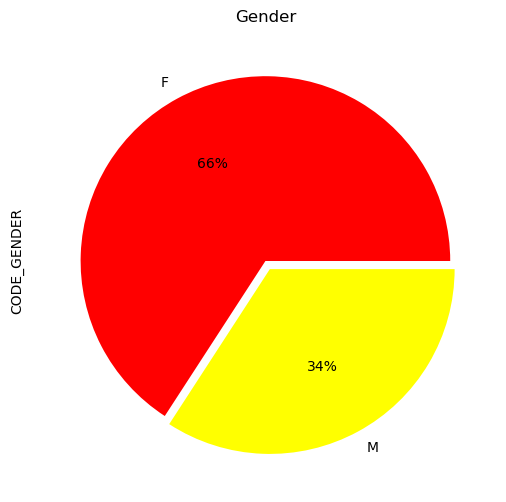

In [55]:
#plotting pieplot for CODE_GENDER
fig = plt.figure(figsize=(13,6))
explode = [0, 0.05]
in1["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%", colors = ["red", "yellow"], explode = explode)
plt.title("Gender")
plt.show()

##### Observation

CODE_GENDER data consists of 66% of females and 34% of males i.e. majority of the clients are females

#### Analysis of ORGANIZATION_TYPE (type of organization where client works)

In [56]:
in1.ORGANIZATION_TYPE.describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [57]:
in1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [58]:
#As there is a huge number of data under XNA its better to add rename the category to Unknown
in1["ORGANIZATION_TYPE"].replace("XNA", "Unknown", inplace = True)

In [59]:
in1.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

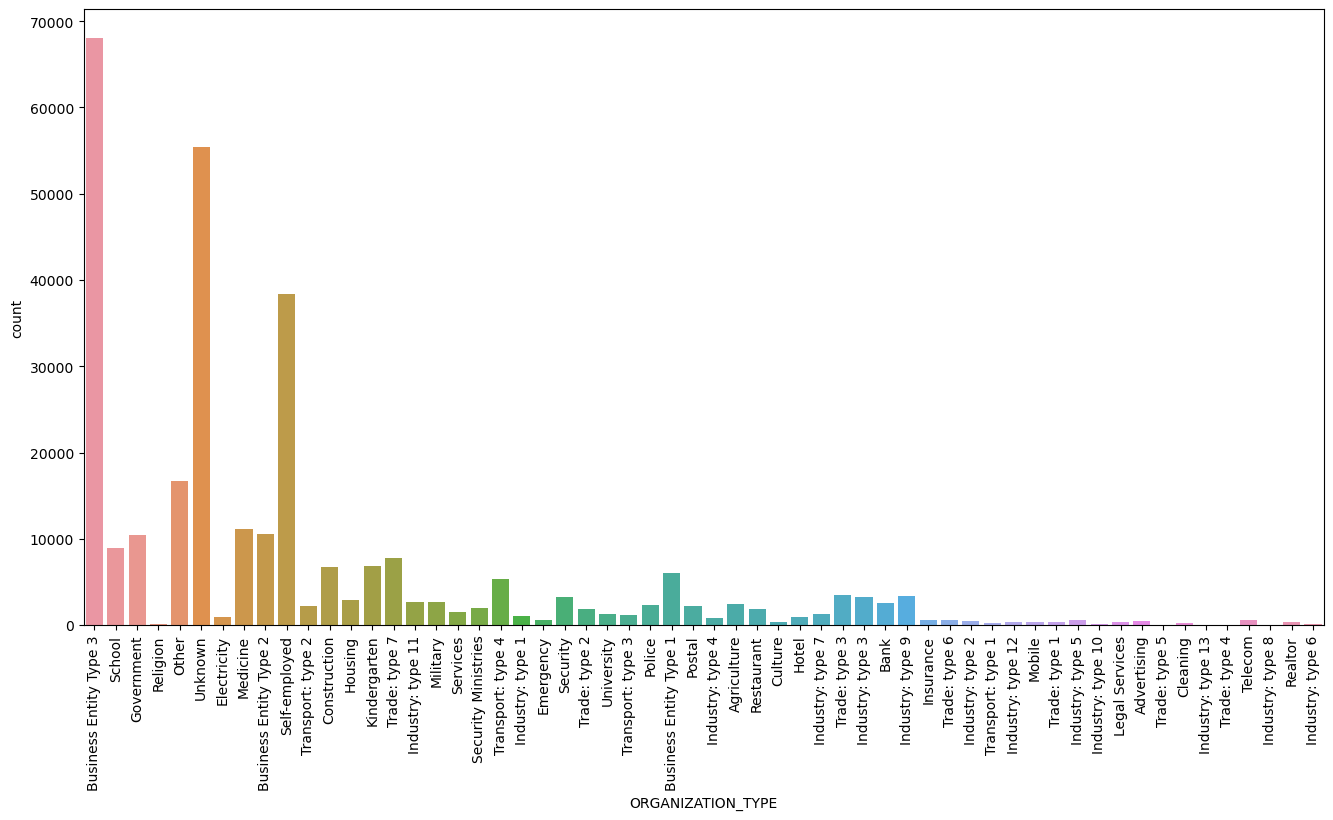

In [60]:
#Plotting the column data using countplot to understand the distribution of data
plt.figure(figsize = (16,8))
sns.countplot(data = in1, x = "ORGANIZATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

##### Observation

* Majority of clients work in Business Entity Type 3 organizations and least in Industry: type 8.

In [61]:
in1.isnull().sum().sort_values()

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_LIVE_REGION           0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
WEEKDAY_APPR_PROCESS_START           0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_2                      0
FLAG_DOCUMENT_3                      0
FLAG_DOCUMENT_4          

In [62]:
#Dropping columns that will not help in further analysis
in1.drop([ "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "EXT_SOURCE_2", "EXT_SOURCE_3", "YEARS_BEGINEXPLUATATION_AVG", "FLOORSMAX_AVG", "YEARS_BEGINEXPLUATATION_MODE", "FLOORSMAX_MODE", "YEARS_BEGINEXPLUATATION_MEDI", "FLOORSMAX_MEDI", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE"], axis=1, inplace = True)

In [63]:
#Checking for null values after dropping unnecessary columns and imputing the rest
in1.isnull().sum().sort_values()

SK_ID_CURR                         0
ORGANIZATION_TYPE                  0
LIVE_CITY_NOT_WORK_CITY            0
REG_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_LIVE_CITY             0
LIVE_REGION_NOT_WORK_REGION        0
REG_REGION_NOT_WORK_REGION         0
REG_REGION_NOT_LIVE_REGION         0
HOUR_APPR_PROCESS_START            0
WEEKDAY_APPR_PROCESS_START         0
OCCUPATION_TYPE                    0
DAYS_REGISTRATION                  0
DAYS_EMPLOYED                      0
DAYS_BIRTH                         0
REGION_POPULATION_RELATIVE         0
DAYS_ID_PUBLISH                    0
NAME_FAMILY_STATUS                 0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
NAME_HOUSING_TYPE                  0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
FLAG_OWN_CAR                       0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
N

In [64]:
in1.isnull().mean()*100

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION     0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION 

#### Analysis of OBS_30_CNT_SOCIAL_CIRCLE(how many observation of client's social surroundings with observable 30 DPD (days past due) default)

In [65]:
in1["OBS_30_CNT_SOCIAL_CIRCLE"].describe()

count   306490.00
mean         1.42
std          2.40
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        348.00
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [66]:
#Replacing null values with mean
in1.OBS_30_CNT_SOCIAL_CIRCLE = in1["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(in1.OBS_30_CNT_SOCIAL_CIRCLE.mean())

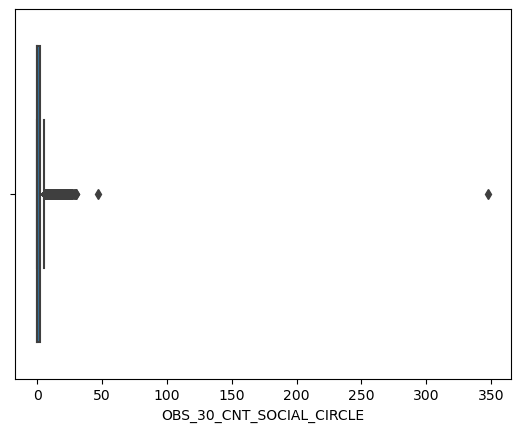

In [67]:
plt.figsize=(14,9)
sns.boxplot(x=in1.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

##### Observation

Outliers are present but according to the problem statement we are just neglecting it.

In [68]:
in1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

#### Analysis of DEF_30_CNT_SOCIAL_CIRCLE(How many observation of client's social surroundings defaulted on 30 DPD (days past due))

In [69]:
in1["DEF_30_CNT_SOCIAL_CIRCLE"].describe()

count   306490.00
mean         0.14
std          0.45
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         34.00
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [70]:
#replacing null values with mean
in1["DEF_30_CNT_SOCIAL_CIRCLE"] = in1["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(in1["DEF_30_CNT_SOCIAL_CIRCLE"].mean())

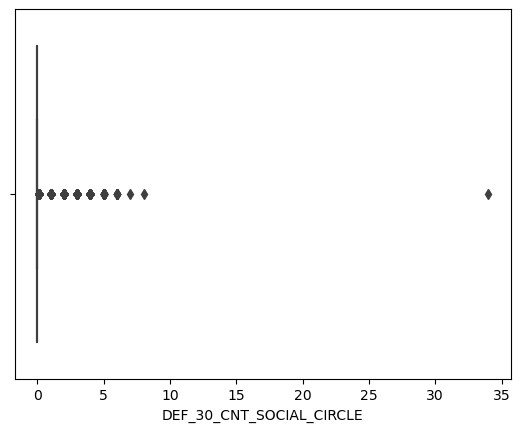

In [71]:
plt.figsize=(10,8)
sns.boxplot(x=in1.DEF_30_CNT_SOCIAL_CIRCLE)
plt.show()

##### Observation

Outliers present but according to the problem statement we are just neglecting it.

In [72]:
in1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

#### Analysis of OBS_60_CNT_SOCIAL_CIRCLE(How many observation of client's social surroundings with observable 60 DPD (days past due) default)

In [73]:
in1["OBS_60_CNT_SOCIAL_CIRCLE"].describe()

count   306490.00
mean         1.41
std          2.38
min          0.00
25%          0.00
50%          0.00
75%          2.00
max        344.00
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [74]:
#Replacing the missing values with median
in1["OBS_60_CNT_SOCIAL_CIRCLE"] = in1["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(in1["OBS_60_CNT_SOCIAL_CIRCLE"].median())

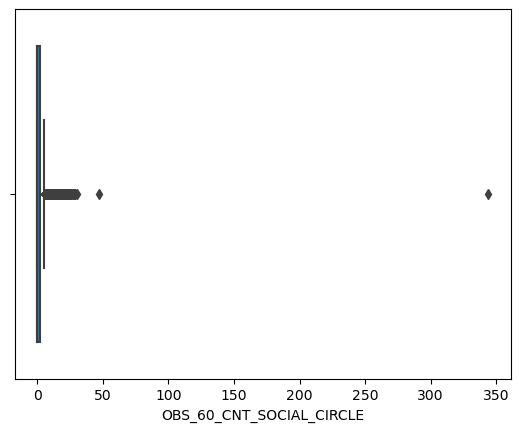

In [75]:
plt.figsize=(8,5)
sns.boxplot(in1["OBS_60_CNT_SOCIAL_CIRCLE"])
plt.show()

##### Observation

Outliers are present but according to the problem statement we are just neglecting it.

In [76]:
in1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

#### Analysis of DEF_60_CNT_SOCIAL_CIRCLE(How many observation of client's social surroundings defaulted on 60 (days past due) DPD)

In [77]:
in1["DEF_60_CNT_SOCIAL_CIRCLE"].describe()

count   306490.00
mean         0.10
std          0.36
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         24.00
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [78]:
#Replacing the missing values with median
in1["DEF_60_CNT_SOCIAL_CIRCLE"] = in1["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(in1["DEF_60_CNT_SOCIAL_CIRCLE"].median())

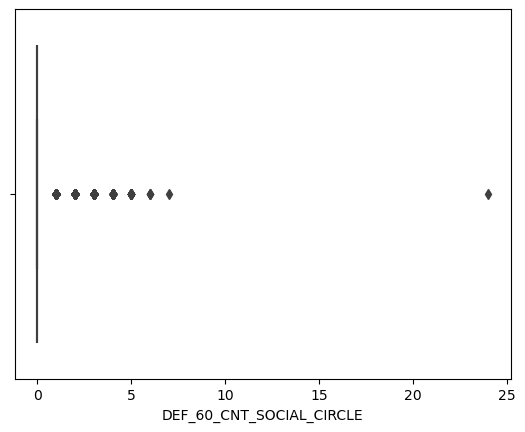

In [79]:
plt.figsize=(8,5)
sns.boxplot(in1["DEF_60_CNT_SOCIAL_CIRCLE"])
plt.show()

##### Observation

Outliers are present but according to the problem statement we are just neglecting it.

In [80]:
in1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

#### Analysis of AMT_REQ_CREDIT_BUREAU_HOUR(Number of enquiries to Credit Bureau about the client one hour before application)

In [81]:
in1.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count   265992.00
mean         0.01
std          0.08
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          4.00
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [82]:
in1.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

41519

In [83]:
#Replacing the missing value with mean
in1["AMT_REQ_CREDIT_BUREAU_HOUR"] = in1["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(in1["AMT_REQ_CREDIT_BUREAU_HOUR"].mean())

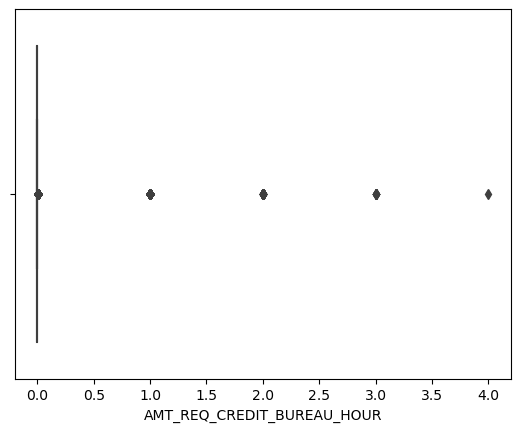

In [84]:
plt.figsize=(8,5)
sns.boxplot(in1["AMT_REQ_CREDIT_BUREAU_HOUR"])
plt.show()

##### Observation

Outliers are present but we are neglecting it as per the problem statement.

#### Analysis of AMT_REQ_CREDIT_BUREAU_DAY(Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application))

In [85]:
in1["AMT_REQ_CREDIT_BUREAU_DAY"].describe()

count   265992.00
mean         0.01
std          0.11
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          9.00
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [86]:
#Replacing missing values with mean
in1["AMT_REQ_CREDIT_BUREAU_DAY"] = in1["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(in1["AMT_REQ_CREDIT_BUREAU_DAY"].mean())

In [87]:
in1["AMT_REQ_CREDIT_BUREAU_DAY"].isnull().sum()

0

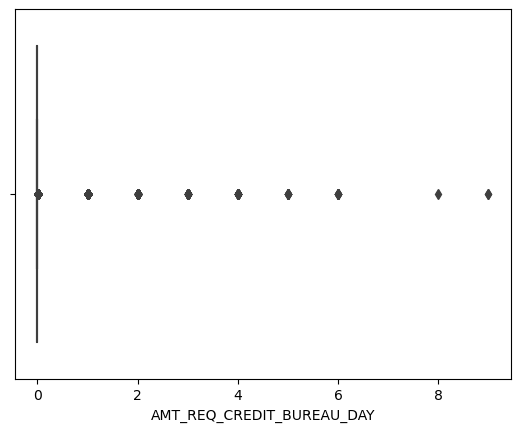

In [88]:
plt.figsize=(8,5)
sns.boxplot(in1["AMT_REQ_CREDIT_BUREAU_DAY"])
plt.show()

##### Observation

Outliers are present but we are neglecting it as per the problem statement.

#### Analysis of AMT_REQ_CREDIT_BUREAU_WEEKNumber of enquiries to Credit Bureau about the client one week before application (excluding one day before application))

In [89]:
in1["AMT_REQ_CREDIT_BUREAU_WEEK"].describe()

count   265992.00
mean         0.03
std          0.20
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          8.00
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [90]:
#The null values can be replaced with mean
in1["AMT_REQ_CREDIT_BUREAU_WEEK"] = in1["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(in1["AMT_REQ_CREDIT_BUREAU_WEEK"].mean())

In [91]:
in1["AMT_REQ_CREDIT_BUREAU_WEEK"].isnull().sum()

0

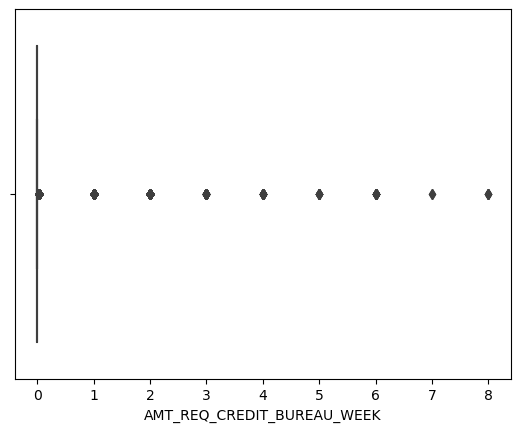

In [92]:
plt.figsize=(8,5)
sns.boxplot(in1["AMT_REQ_CREDIT_BUREAU_WEEK"])
plt.show()

##### Observation

Outliers are present but we neglect them acccording to the problem statement.

In [93]:
in1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

#### Analysis of AMT_REQ_CREDIT_BUREAU_MON(Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application))

In [94]:
in1.AMT_REQ_CREDIT_BUREAU_MON.describe()

count   265992.00
mean         0.27
std          0.92
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         27.00
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [95]:
#As there are no outliers the null values can be replaced with mean
in1["AMT_REQ_CREDIT_BUREAU_MON"] = in1["AMT_REQ_CREDIT_BUREAU_MON"].fillna(in1["AMT_REQ_CREDIT_BUREAU_MON"].mean())

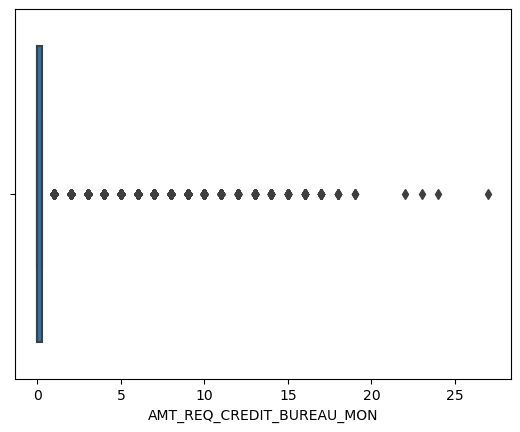

In [96]:
plt.figsize=(8,5)
sns.boxplot(in1["AMT_REQ_CREDIT_BUREAU_MON"])
plt.show()

##### Observation

Outliers are present but we neglect them acccording to the problem statement.

In [97]:
in1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

#### Analysis of AMT_REQ_CREDIT_BUREAU_QRT(Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application))

In [98]:
in1["AMT_REQ_CREDIT_BUREAU_QRT"].describe()

count   265992.00
mean         0.27
std          0.79
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        261.00
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [99]:
#Replacing missing values with median
in1["AMT_REQ_CREDIT_BUREAU_QRT"] = in1["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(in1["AMT_REQ_CREDIT_BUREAU_QRT"].median())

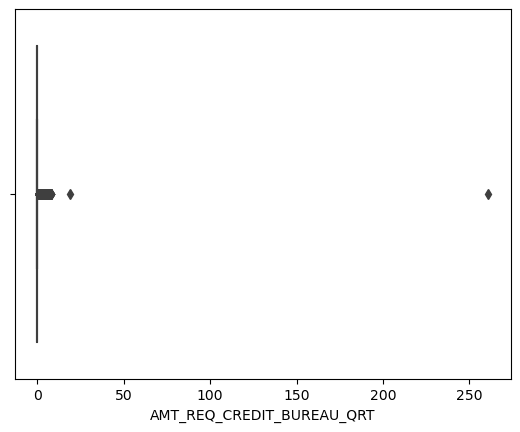

In [100]:
plt.figsize=(8,5)
sns.boxplot(in1["AMT_REQ_CREDIT_BUREAU_QRT"])
plt.show()

##### Observation

Outliers are present but we neglect them acccording to the problem statement.

In [101]:
in1.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
CNT_FAM_MEMBERS                    2
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
L

#### Analysis of AMT_REQ_CREDIT_BUREAU_YEAR(Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application))

In [102]:
in1["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()

count   265992.00
mean         1.90
std          1.87
min          0.00
25%          0.00
50%          1.00
75%          3.00
max         25.00
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [103]:
#As there are outliers we replace missing values with median
in1["AMT_REQ_CREDIT_BUREAU_YEAR"] = in1["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(in1["AMT_REQ_CREDIT_BUREAU_YEAR"].mean())

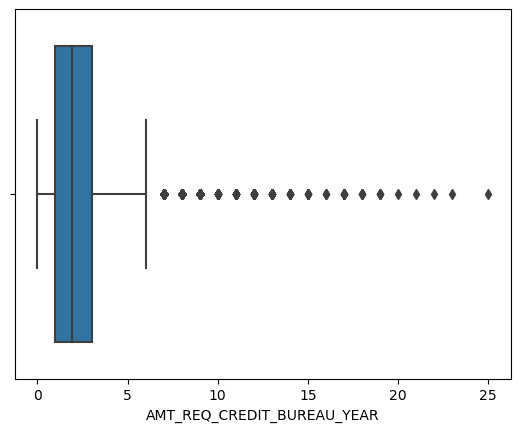

In [104]:
plt.figsize=(8,5)
sns.boxplot(in1["AMT_REQ_CREDIT_BUREAU_YEAR"])
plt.show()

##### Observation

There are outliers present but according to the problem statement we are just ignoring them.

In [105]:
in1.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                2
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_

Ignoring the CNT_FAM_MEMBERS column as it only contains two null values

In [106]:
in1.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [107]:
#importing previous application dataset
in2= pd.read_csv("/Users/amalajith/Downloads/previous_application.csv")

In [108]:
#Checking the shape of the dataframe
in2.shape

(1670214, 37)

In [109]:
in2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,NaN,607500.00,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,NaN,112500.00,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,NaN,450000.00,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,NaN,337500.00,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
in2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [111]:
in2.isnull().values.any()

True

In [112]:
#Checking the number of null values in the columns
in2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

#### Data Cleaning of Previous Application dataset

In [113]:
#sorting the percentage of null values of each column in descending order
(in2.isnull().mean()*100).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED      99.64
RATE_INTEREST_PRIMARY         99.64
AMT_DOWN_PAYMENT              53.64
RATE_DOWN_PAYMENT             53.64
NAME_TYPE_SUITE               49.12
NFLAG_INSURED_ON_APPROVAL     40.30
DAYS_TERMINATION              40.30
DAYS_LAST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION     40.30
DAYS_FIRST_DUE                40.30
DAYS_FIRST_DRAWING            40.30
AMT_GOODS_PRICE               23.08
AMT_ANNUITY                   22.29
CNT_PAYMENT                   22.29
PRODUCT_COMBINATION            0.02
AMT_CREDIT                     0.00
NAME_YIELD_GROUP               0.00
NAME_PORTFOLIO                 0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
SK_ID_PREV                     0.00
NAME_GOODS_CATEGORY            0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
SK_ID_CURR                     0.00
DAYS_DECISION               

As there are higher number of columns with missing values we decided to drop columns with percentage of null values >50.

In [114]:
#Deleting columns with higher than 50 percent missing values
delcolumns=["AMT_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIVILEGED"]
in2.drop(delcolumns, inplace=True,axis=1)

In [115]:
#Verifing the columns are dropped
in2.isnull().mean()*100

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                   22.29
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
DAYS_FIRST_DRAWING          

#### Missing value treatment for Previous application dataset

#### Analysis of AMT_ANNUITY(Annuity of previous application)

In [116]:
#finding the number of null values
in2["AMT_ANNUITY"].isnull().sum()

372235

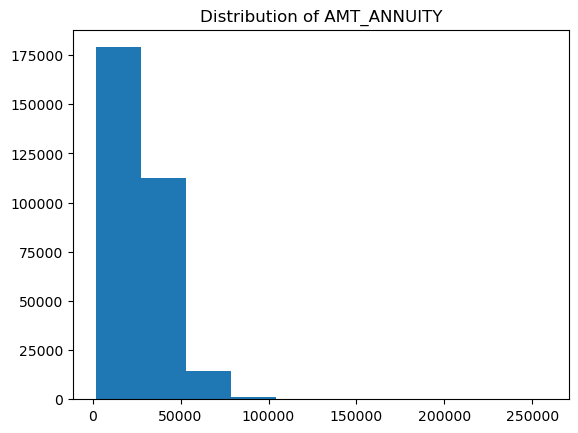

In [117]:
##Plotting the distribution of AMT_ANNUITY
plt.hist(in1["AMT_ANNUITY"])
plt.title("Distribution of AMT_ANNUITY")
plt.show()

In [118]:
in1["AMT_ANNUITY"].describe()

count   307511.00
mean     27108.49
std      14493.46
min       1615.50
25%      16524.00
50%      24903.00
75%      34596.00
max     258025.50
Name: AMT_ANNUITY, dtype: float64

In [119]:
#Replacing the null values with median
in2["AMT_ANNUITY"]=in2.AMT_ANNUITY.fillna(in1["AMT_ANNUITY"].median())

In [120]:
in2.AMT_ANNUITY.isnull().sum()

0

In [121]:
in2.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

#### Analysis of AMT_GOODS_PRICE(Goods price of good that client asked for (if applicable) on the previous application)

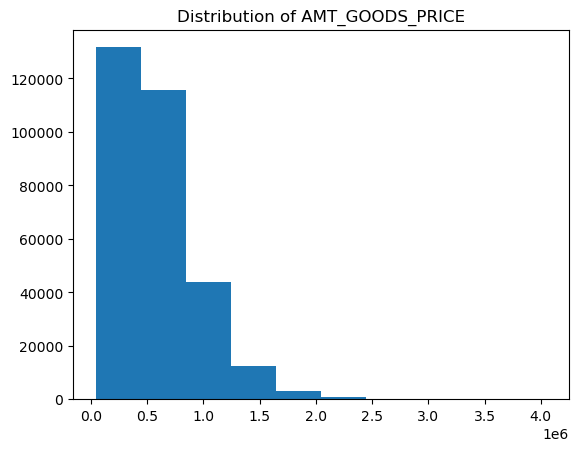

In [122]:
##Plotting the distribution of OBS_60_CNT_SOCIAL_CIRCLE
plt.hist(in1["AMT_GOODS_PRICE"])
plt.title("Distribution of AMT_GOODS_PRICE")
plt.show()

In [123]:
in2["AMT_GOODS_PRICE"].describe()

count   1284699.00
mean     227847.28
std      315396.56
min           0.00
25%       50841.00
50%      112320.00
75%      234000.00
max     6905160.00
Name: AMT_GOODS_PRICE, dtype: float64

In [124]:
in2["AMT_GOODS_PRICE"].isnull().sum()

385515

In [125]:
in2["AMT_GOODS_PRICE"].head()

0    17145.00
1   607500.00
2   112500.00
3   450000.00
4   337500.00
Name: AMT_GOODS_PRICE, dtype: float64

In [126]:
in2["AMT_GOODS_PRICE"].isnull().sum()

385515

In [127]:
#Replacing the null values with median
in2["AMT_GOODS_PRICE"] = in2["AMT_GOODS_PRICE"].fillna(in2["AMT_GOODS_PRICE"].median())

In [128]:
in2["AMT_GOODS_PRICE"].isnull().sum()

0

#### Analysis of NAME_TYPE_SUITE(Who accompanied client when applying for the previous application)

In [129]:
in2["NAME_TYPE_SUITE"].describe()

count            849809
unique                7
top       Unaccompanied
freq             508970
Name: NAME_TYPE_SUITE, dtype: object

In [130]:
in2["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [131]:
#Replacing the null values in NAME_TYPE_SUITE with Missing keyword
in2["NAME_TYPE_SUITE"] = in2["NAME_TYPE_SUITE"].fillna("Missing")
in2.NAME_TYPE_SUITE.value_counts()

Missing            820405
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

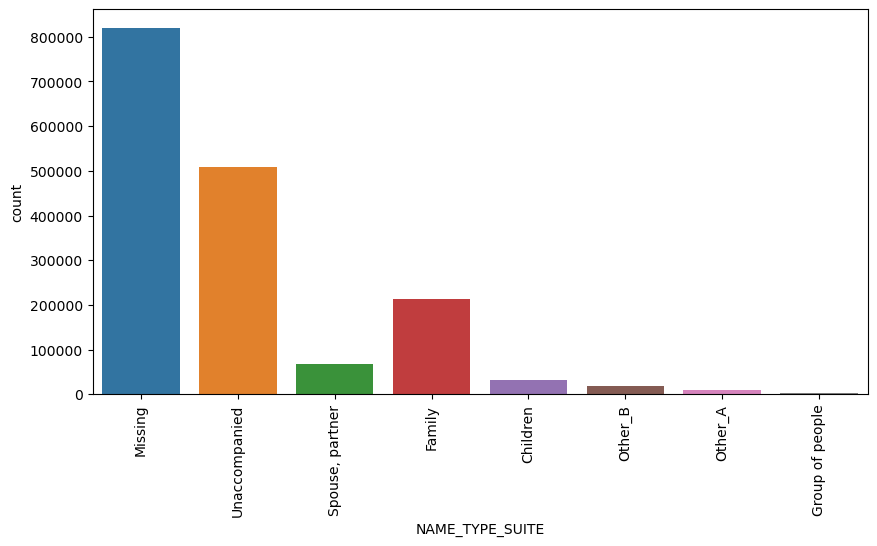

In [132]:
#Plotting the column dats using countplot to understand the distribution of data
plt.figure(figsize = (10,5))
sns.countplot(data = in2, x ="NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

#### Analysis of CNT_Payment(Term of previous credit at application of the previous application)

In [133]:
in2["CNT_PAYMENT"].describe()

count   1297984.00
mean         16.05
std          14.57
min           0.00
25%           6.00
50%          12.00
75%          24.00
max          84.00
Name: CNT_PAYMENT, dtype: float64

In [134]:
in2["CNT_PAYMENT"].isnull().sum()

372230

In [135]:
#Replacing the missing values with mean
in2["CNT_PAYMENT"] = in2["CNT_PAYMENT"].fillna(in2["CNT_PAYMENT"].mean())

In [136]:
in2["CNT_PAYMENT"].isnull().sum()

0

#### Analysis of DAYS_FIRST_DRAWING(Relative to application date of current application when was the first disbursement of the previous application)

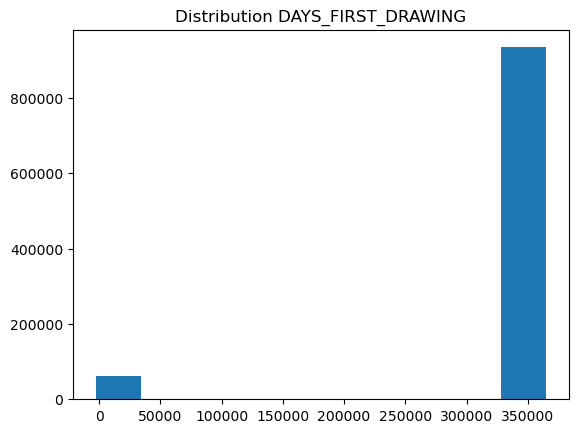

In [137]:
##Plotting the distribution of DAYS_FIRST_DRAWING
plt.hist(in2["DAYS_FIRST_DRAWING"])
plt.title("Distribution DAYS_FIRST_DRAWING")
plt.show()

In [138]:
in2["DAYS_FIRST_DRAWING"].describe()

count   997149.00
mean    342209.86
std      88916.12
min      -2922.00
25%     365243.00
50%     365243.00
75%     365243.00
max     365243.00
Name: DAYS_FIRST_DRAWING, dtype: float64

In [139]:
in2["DAYS_FIRST_DRAWING"].isnull().sum()

673065

In [140]:
#Replacing DAYS_FIRST_DRAWING with median
in2["DAYS_FIRST_DRAWING"] = in2["DAYS_FIRST_DRAWING"].fillna(in2["DAYS_FIRST_DRAWING"].median())

In [141]:
in2["DAYS_FIRST_DRAWING"].isnull().sum()


0

#### Analysis of DAYS_FIRST_DUE(Relative to application date of current application when was the first due supposed to be of the previous application)

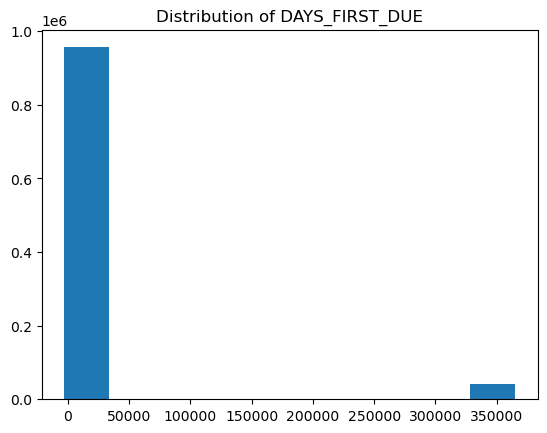

In [142]:
##Plotting the distribution of DAYS_FIRST_DUE
plt.hist(in2["DAYS_FIRST_DUE"])
plt.title("Distribution of DAYS_FIRST_DUE")
plt.show()

In [143]:
in2['DAYS_FIRST_DUE'].describe()

count   997149.00
mean     13826.27
std      72444.87
min      -2892.00
25%      -1628.00
50%       -831.00
75%       -411.00
max     365243.00
Name: DAYS_FIRST_DUE, dtype: float64

In [144]:
#Analysing the distribution of data in the column using quantiles
in2['DAYS_FIRST_DUE'].quantile([0.1,0.2,.3,0.4,0.5,0.6,0.7,0.8,.9])

0.10   -2392.00
0.20   -1875.00
0.30   -1425.00
0.40   -1068.00
0.50    -831.00
0.60    -653.00
0.70    -490.00
0.80    -332.00
0.90    -173.00
Name: DAYS_FIRST_DUE, dtype: float64

In [145]:
in2['DAYS_FIRST_DUE'].isnull().sum()

673065

In [146]:
#Replacing null values with median
in2['DAYS_FIRST_DUE'] = in2['DAYS_FIRST_DUE'].fillna(in2['DAYS_FIRST_DUE'].median())

In [147]:
in2['DAYS_FIRST_DUE'].isnull().sum()

0

In [148]:
in2.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                     0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         0
NAME_YIELD_GROUP                    0
PRODUCT_COMB

#### Analysis of PRODUCT_COMBINATION(Detailed product combination of the previous application)

In [149]:
in2["PRODUCT_COMBINATION"].unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [150]:
in2["PRODUCT_COMBINATION"].isnull().sum()

346

In [151]:
in2["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [152]:
#Filling the null values using Cash keyword.
in2["PRODUCT_COMBINATION"] = in2["PRODUCT_COMBINATION"].fillna("Cash")

In [153]:
in2["PRODUCT_COMBINATION"].value_counts()

Cash                              286336
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

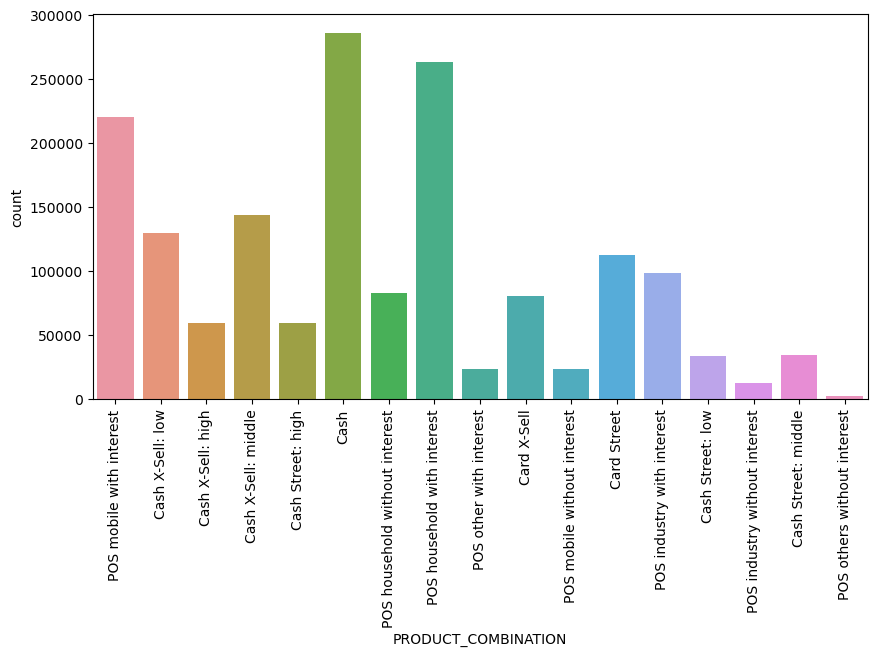

In [154]:
#Plotting the column dats using countplot to understand the distribution of data
plt.figure(figsize = (10,5))
sns.countplot(data = in2, x ="PRODUCT_COMBINATION")
plt.xticks(rotation = 90)
plt.show()

#### Observation

Cash has the highest count and POS others without interest has the least.

#### Analysis of DAYS_LAST_DUE_1ST_VERSION(Relative to application date of current application when was the first due of the previous application)

In [155]:
in2["DAYS_LAST_DUE_1ST_VERSION"].describe()

count   997149.00
mean     33767.77
std     106857.03
min      -2801.00
25%      -1242.00
50%       -361.00
75%        129.00
max     365243.00
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [156]:
#Analysing the distribution of data in the column using quantiles
in2['DAYS_LAST_DUE_1ST_VERSION'].quantile([0.1,0.2,.3,0.4,0.5,0.6,0.7,0.8,.9])

0.10   -2047.00
0.20   -1495.00
0.30   -1015.00
0.40    -641.00
0.50    -361.00
0.60    -150.00
0.70      31.00
0.80     267.00
0.90    1432.00
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [157]:
#Replacing the missing values with median
in2["DAYS_LAST_DUE_1ST_VERSION"] = in2["DAYS_LAST_DUE_1ST_VERSION"].fillna(in2["DAYS_LAST_DUE_1ST_VERSION"].median())

In [158]:
in2.DAYS_LAST_DUE_1ST_VERSION.isnull().sum()

0

#### Analysis of DAYS_LAST_DUE(Relative to application date of current application when was the last due date of the previous application)

In [159]:
in2["DAYS_LAST_DUE"].describe()

count   997149.00
mean     76582.40
std     149647.42
min      -2889.00
25%      -1314.00
50%       -537.00
75%        -74.00
max     365243.00
Name: DAYS_LAST_DUE, dtype: float64

In [160]:
#Analysing the distribution of data in the column using quantiles
in2['DAYS_LAST_DUE'].quantile([0.1,0.2,.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.10    -2081.00
0.20    -1552.00
0.30    -1109.00
0.40     -785.00
0.50     -537.00
0.60     -337.00
0.70     -165.00
0.80   365243.00
0.90   365243.00
Name: DAYS_LAST_DUE, dtype: float64

In [161]:
#Replacing the missing values with median
in2["DAYS_LAST_DUE"] = in2["DAYS_LAST_DUE"].fillna(in2["DAYS_LAST_DUE"].median())

#### Analysis of DAYS_TERMINATION(Relative to application date of current application when was the expected termination of the previous application)

In [162]:
in2["DAYS_TERMINATION"].describe()

count   997149.00
mean     81992.34
std     153303.52
min      -2874.00
25%      -1270.00
50%       -499.00
75%        -44.00
max     365243.00
Name: DAYS_TERMINATION, dtype: float64

In [163]:
#Analysing the distribution of data in the column using quantiles
in2['DAYS_TERMINATION'].quantile([0.1,0.2,.3,0.4,0.5,0.6,0.7,0.8,.9])

0.10    -2052.00
0.20    -1507.00
0.30    -1066.00
0.40     -744.00
0.50     -499.00
0.60     -303.00
0.70     -134.00
0.80   365243.00
0.90   365243.00
Name: DAYS_TERMINATION, dtype: float64

In [164]:
#Replacing the missing values with median value
in2["DAYS_TERMINATION"] =in2["DAYS_TERMINATION"].fillna(in2["DAYS_TERMINATION"].median())

#### Analysis of NFLAG_INSURED_ON_APPROVAL(Did the client requested insurance during the previous application)

In [165]:
in2["NFLAG_INSURED_ON_APPROVAL"].describe()

count   997149.00
mean         0.33
std          0.47
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          1.00
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [166]:
#Analysing the distribution of data in the column using quantiles
in2['NFLAG_INSURED_ON_APPROVAL'].quantile([0.1,0.2,.3,0.4,0.5,0.6,0.7,0.8,.9])

0.10   0.00
0.20   0.00
0.30   0.00
0.40   0.00
0.50   0.00
0.60   0.00
0.70   1.00
0.80   1.00
0.90   1.00
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [167]:
in2["NFLAG_INSURED_ON_APPROVAL"].isnull().sum()

673065

In [168]:
#Replacing the missing values with the median value of the column
in2["NFLAG_INSURED_ON_APPROVAL"] = in2["NFLAG_INSURED_ON_APPROVAL"].fillna(in2["NFLAG_INSURED_ON_APPROVAL"].median())

In [169]:
in2["NFLAG_INSURED_ON_APPROVAL"].isnull().sum()

0

In [170]:
in2.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

#### Analysis of AMT_CREDIT(Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT)

In [171]:
in2["AMT_CREDIT"].describe()

count   1670213.00
mean     196114.02
std      318574.62
min           0.00
25%       24160.50
50%       80541.00
75%      216418.50
max     6905160.00
Name: AMT_CREDIT, dtype: float64

In [172]:
#Replacing the missing values with median
in2["AMT_CREDIT"] = in2["AMT_CREDIT"].fillna(in2["AMT_CREDIT"].median())

In [173]:
in2["AMT_CREDIT"].isnull().sum()

0

#### Analysis of NAME_CASH_LOAN_PURPOSE(Purpose of the cash loan)

In [174]:
in2.NAME_CASH_LOAN_PURPOSE.describe()

count     1670214
unique         25
top           XAP
freq       922661
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [175]:
in2.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

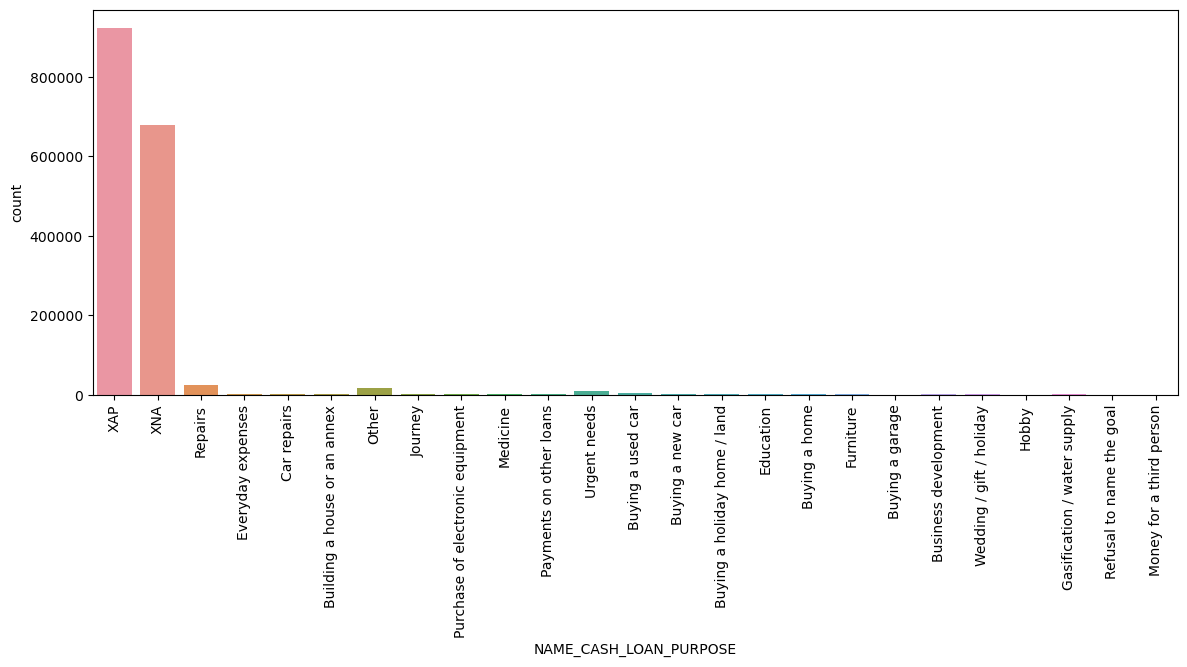

In [176]:
plt.figure(figsize = (14,5))
sns.countplot(data = in2, x ="NAME_CASH_LOAN_PURPOSE")
plt.xticks(rotation = 90)
plt.show()

##### Observation

As there are large number of XNA, XAP(null values) values present we aren't imputing or dropping the column we just leave it as it is. 

#### Analysis of NAME_PAYMENT_TYPE(Payment method that client chose to pay for the previous application)

In [177]:
in2.NAME_PAYMENT_TYPE.describe()

count                   1670214
unique                        4
top       Cash through the bank
freq                    1033552
Name: NAME_PAYMENT_TYPE, dtype: object

In [178]:
in2.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

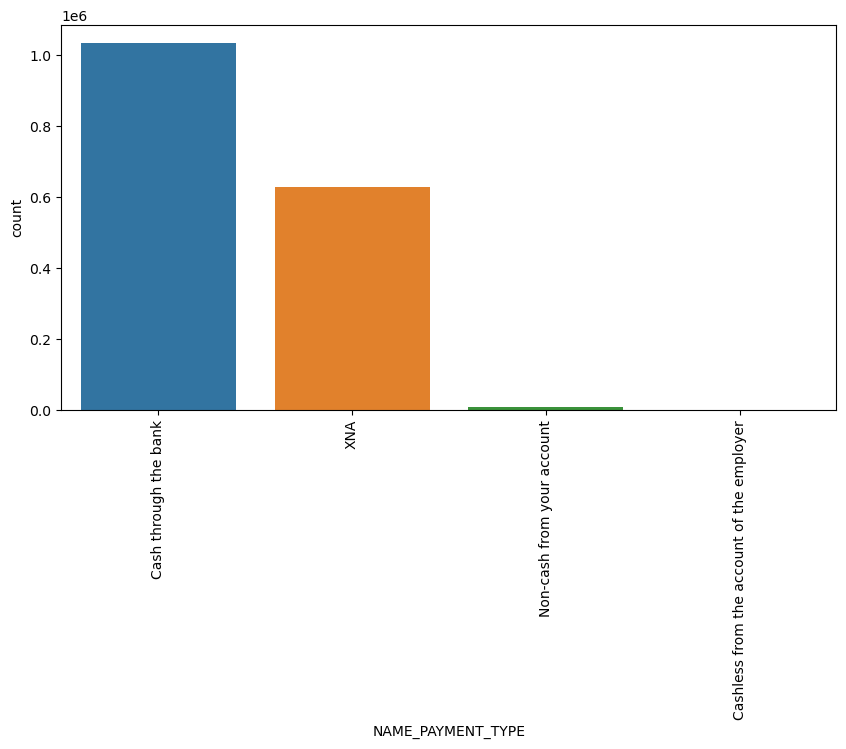

In [179]:
plt.figure(figsize = (10,5))
sns.countplot(data = in2, x ="NAME_PAYMENT_TYPE")
plt.xticks(rotation = 90)
plt.show()

##### Observation

As there are large number of XNA values present we aren't imputing or dropping the column we just leave it as it is.

#### Analysis of CODE_REJECT_REASON(Why was the previous application rejected)

In [180]:
in2.CODE_REJECT_REASON.describe()

count     1670214
unique          9
top           XAP
freq      1353093
Name: CODE_REJECT_REASON, dtype: object

In [181]:
in2.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

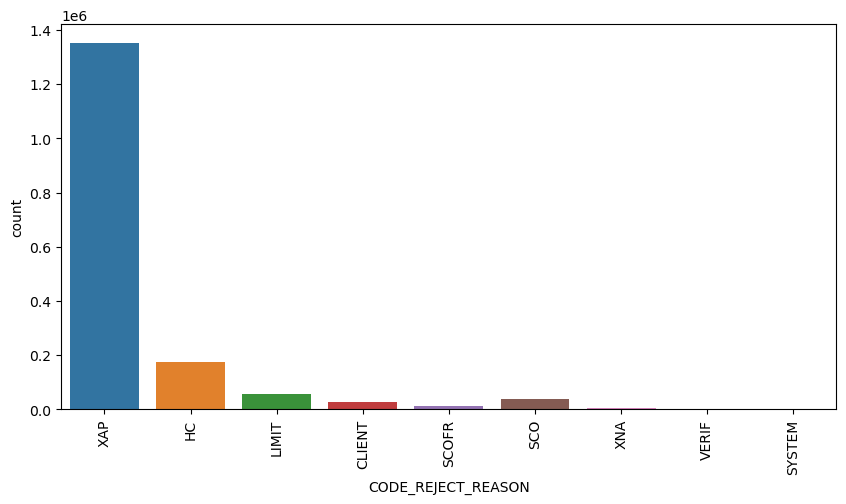

In [182]:
#Plotiing the countplot for CODE_REJECT_REASON
plt.figure(figsize = (10,5))
sns.countplot(data = in2, x ="CODE_REJECT_REASON")
plt.xticks(rotation = 90)
plt.show()

##### Observation

As there are large number of XAP values present we aren't imputing or dropping the column we just leave it as it is.

#### Analysis of NAME_TYPE_SUITE(Who accompanied client when applying for the previous application)

In [183]:
in2.NAME_TYPE_SUITE.describe()

count     1670214
unique          8
top       Missing
freq       820405
Name: NAME_TYPE_SUITE, dtype: object

In [184]:
in2.NAME_TYPE_SUITE.value_counts()

Missing            820405
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

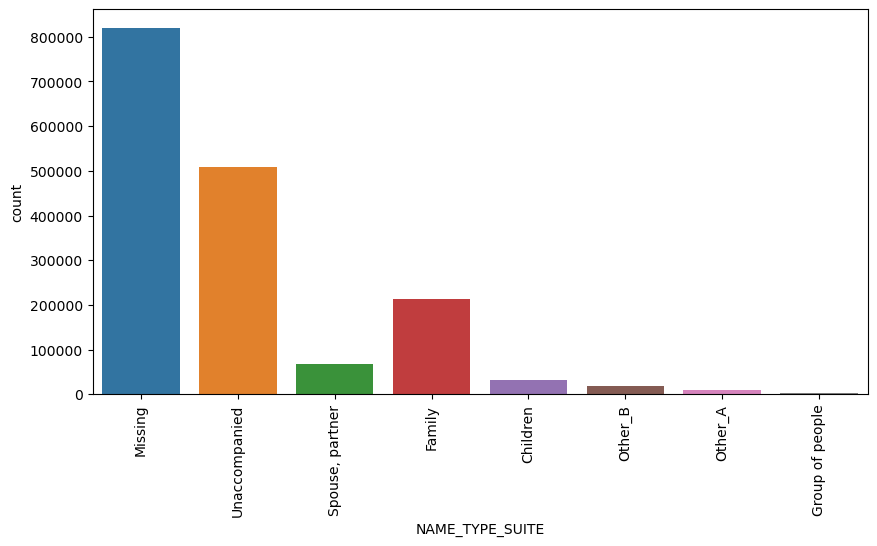

In [185]:
#Plotting count plot for NAME_TYPE_SUITE
plt.figure(figsize = (10,5))
sns.countplot(data = in2, x ="NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

##### Observation

As there are large number of 'Missing' counts present we aren't imputing or dropping the column we just leave it as it is.

#### Analysis of NAME_GOODS_CATEGORY(What kind of goods did the client apply for in the previous application)

In [186]:
in2.NAME_GOODS_CATEGORY.describe()

count     1670214
unique         28
top           XNA
freq       950809
Name: NAME_GOODS_CATEGORY, dtype: object

In [187]:
in2.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

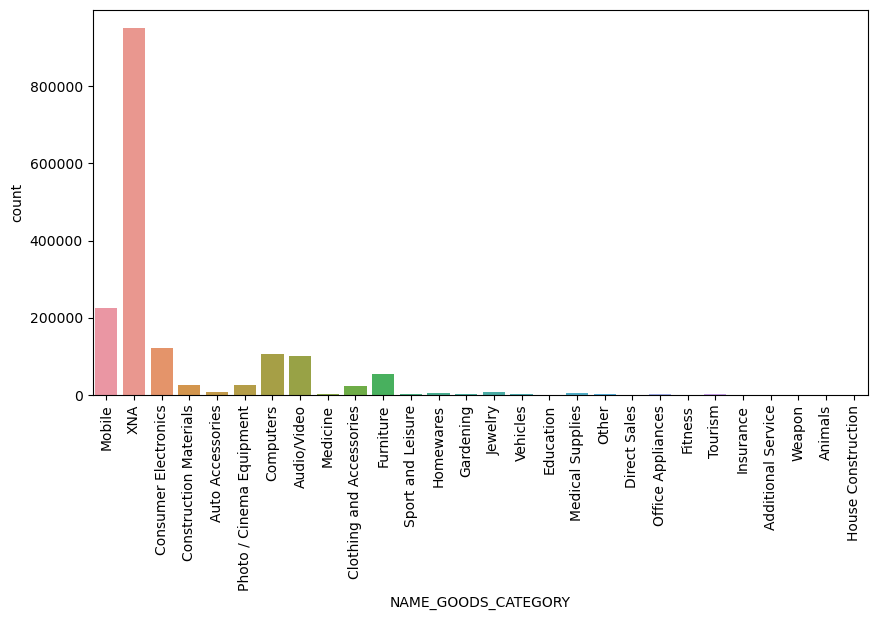

In [188]:
plt.figure(figsize = (10,5))
sns.countplot(data = in2, x ="NAME_GOODS_CATEGORY")
plt.xticks(rotation = 90)
plt.show()

##### Observation

As there are large number of XNA values present we aren't imputing or dropping the column we just leave it as it is.

#### Analysis of NAME_PRODUCT_TYPE(Was the previous application x-sell o walk-in)

In [189]:
in2.NAME_PRODUCT_TYPE.describe()

count     1670214
unique          3
top           XNA
freq      1063666
Name: NAME_PRODUCT_TYPE, dtype: object

In [190]:
in2.NAME_PRODUCT_TYPE.value_counts()

XNA        1063666
x-sell      456287
walk-in     150261
Name: NAME_PRODUCT_TYPE, dtype: int64

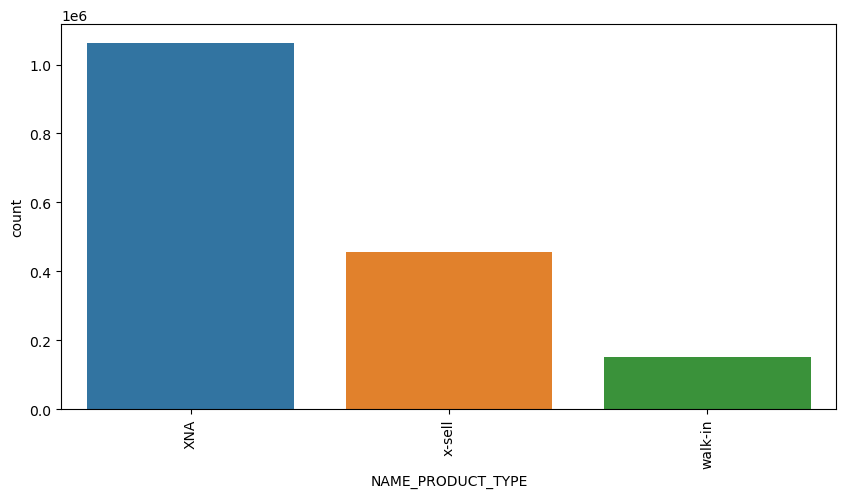

In [191]:
plt.figure(figsize = (10,5))
sns.countplot(data = in2, x ="NAME_PRODUCT_TYPE")
plt.xticks(rotation = 90)
plt.show()

##### Observation

As there are large number of XNA values present we aren't imputing or dropping the column we just leave it as it is.

#### Analysis of NAME_SELLER_INDUSTRY(The industry of the seller)

In [192]:
in2.NAME_SELLER_INDUSTRY.describe()

count     1670214
unique         11
top           XNA
freq       855720
Name: NAME_SELLER_INDUSTRY, dtype: object

In [193]:
in2.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [194]:
in2.NAME_SELLER_INDUSTRY.value_counts()

XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

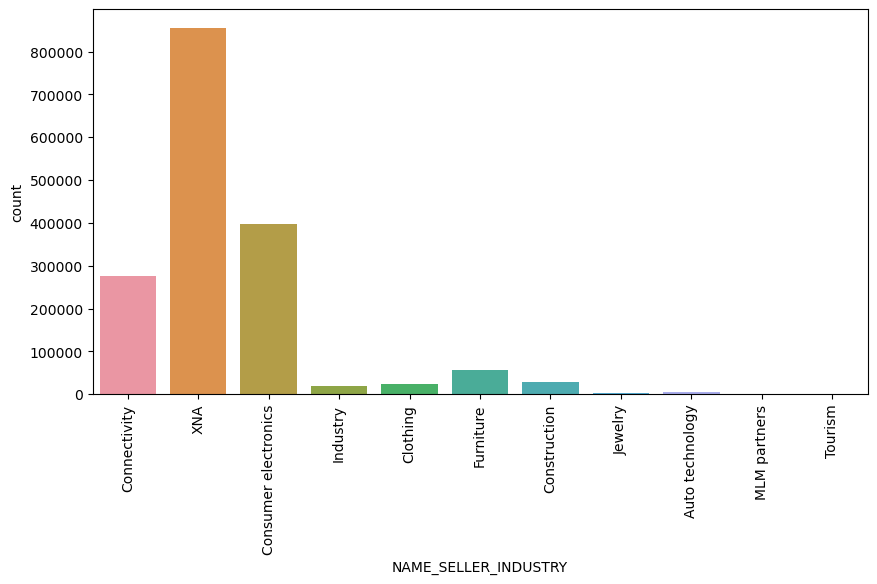

In [195]:
plt.figure(figsize = (10,5))
sns.countplot(data = in2, x ="NAME_SELLER_INDUSTRY")
plt.xticks(rotation = 90)
plt.show()

##### Observation

As there are large number of XNA values present we aren't imputing or dropping the column we just leave it as it is.

In [196]:
#Checking for null values after the cleaning of data
in2.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

### Data Preprocessing

In [197]:
in1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,Laborers,1.00,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,Core staff,2.00,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,Laborers,1.00,MONDAY,9,0,0,0,0,0,0,Government,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,Laborers,2.00,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,0.01,0.01,0.03,0.27,0.00,1.90
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-4311.00,-3458,Core staff,1.00,THURSDAY,11,0,0,0,0,1,1,Religion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


We can see that some of the columns in application data set gor negative values, so they need to be converted to positive values

In [198]:
#Here we use abs() function which returns absolute value for every element in the respective columns
in1['DAYS_BIRTH'] = abs(in1['DAYS_BIRTH'])
in1['DAYS_EMPLOYED'] = abs(in1['DAYS_EMPLOYED'])
in1['DAYS_REGISTRATION'] = abs(in1['DAYS_REGISTRATION'])
in1['DAYS_ID_PUBLISH'] = abs(in1['DAYS_ID_PUBLISH'])

In [199]:
in1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,2120,Laborers,1.00,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,Core staff,2.00,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,2531,Laborers,1.00,MONDAY,9,0,0,0,0,0,0,Government,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,9833.00,2437,Laborers,2.00,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,0.01,0.01,0.03,0.27,0.00,1.90
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,3458,Core staff,1.00,THURSDAY,11,0,0,0,0,1,1,Religion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [200]:
# Lets create bins for AMT_INCOME_TOTAL column
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000-100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

In [201]:
#Here we feature engineering a new column named AMT_INCOME_RANGE and assigning the column elements of AMT_INCOME_TOTAL into different bins using pandas.cut() fucntion
in1['AMT_INCOME_RANGE'] = pd.cut(in1['AMT_INCOME_TOTAL'], bins=bins, labels=slot)

In [202]:
in1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,2120,Laborers,1.00,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,200000-225000
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,Core staff,2.00,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,250000-275000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,2531,Laborers,1.00,MONDAY,9,0,0,0,0,0,0,Government,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50000-75000
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,9833.00,2437,Laborers,2.00,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,0.01,0.01,0.03,0.27,0.00,1.90,125000-150000
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,3458,Core staff,1.00,THURSDAY,11,0,0,0,0,1,1,Religion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100000-125000


In [203]:
in1["AMT_INCOME_RANGE"].value_counts()

125000-150000       47890
100000-125000       43701
200000-225000       40797
75000-100000        39806
150000-175000       34663
175000-200000       29644
50000-75000         19375
250000-275000       12733
225000-250000        7340
300000-325000        6752
350000-375000        4537
25000-50000          4517
275000-300000        4306
425000-450000        3113
500000 and above     2702
325000-350000        2122
400000-425000        1811
375000-400000        1265
475000-500000         312
450000-475000         125
0-25000                 0
Name: AMT_INCOME_RANGE, dtype: int64

In [204]:
#Lets create bins for AMT_CREDIT column

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

In [205]:
#Here we feature engineering a new column named AMT_CREDIT_RANGE and assigning the column elements of AMT_CREDIT into different bins using pandas.cut() fucntion
in1['AMT_CREDIT_RANGE'] = pd.cut(in1['AMT_CREDIT'], bins=bins, labels=slots)

In [206]:
in1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,2120,Laborers,1.00,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.00,2.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,Core staff,2.00,MONDAY,11,0,0,0,0,0,0,School,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,2531,Laborers,1.00,MONDAY,9,0,0,0,0,0,0,Government,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,9833.00,2437,Laborers,2.00,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.00,0.00,2.00,0.00,0.01,0.01,0.03,0.27,0.00,1.90,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,3458,Core staff,1.00,THURSDAY,11,0,0,0,0,1,1,Religion,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100000-125000,500000-550000


In [207]:
in1.AMT_CREDIT_RANGE.value_counts()

900000 and above    58912
250000-300000       31759
200000-250000       23054
500000-550000       22678
400000-450000       18239
0-150000            18159
150000-200000       17985
300000-350000       16205
650000-700000       15051
450000-500000       13799
750000-800000       12380
800000-850000       11559
550000-600000       11554
850000-900000       10233
350000-400000       10133
600000-650000        8998
700000-750000        6813
Name: AMT_CREDIT_RANGE, dtype: int64

CNT_FAM_MEMBERS,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE columns are represented in float lets convert it into int.

In [208]:
in1['CNT_FAM_MEMBERS'] = in1.CNT_FAM_MEMBERS.fillna(0).astype('int')
in1.CNT_FAM_MEMBERS.values

array([1, 2, 1, ..., 1, 2, 2])

In [209]:
in1['OBS_30_CNT_SOCIAL_CIRCLE'] = in1.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0).astype('int')
in1['OBS_30_CNT_SOCIAL_CIRCLE'].values

array([2, 1, 0, ..., 6, 0, 0])

In [210]:
in1['DEF_30_CNT_SOCIAL_CIRCLE'] = in1.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0).astype('int')
in1.DEF_30_CNT_SOCIAL_CIRCLE.values

array([2, 0, 0, ..., 0, 0, 0])

In [211]:
in1['OBS_60_CNT_SOCIAL_CIRCLE'] = in1.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0).astype('int')
in1['OBS_60_CNT_SOCIAL_CIRCLE'].values

array([2, 1, 0, ..., 6, 0, 0])

In [212]:
in1['DEF_60_CNT_SOCIAL_CIRCLE'] = in1.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0).astype('int')
in1.DEF_60_CNT_SOCIAL_CIRCLE.values

array([2, 0, 0, ..., 0, 0, 0])

### Data Analysis

In [213]:
in1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,2120,Laborers,1,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0.00,0.00,0.00,0.00,0.00,1.00,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,Core staff,2,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,2531,Laborers,1,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,19005,3039,9833.00,2437,Laborers,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2,0,2,0,0.01,0.01,0.03,0.27,0.00,1.90,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,19932,3038,4311.00,3458,Core staff,1,THURSDAY,11,0,0,0,0,1,1,Religion,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,100000-125000,500000-550000


In [214]:
in2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,17145.00,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Missing,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,607500.00,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,112500.00,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,450000.00,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Missing,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,337500.00,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Missing,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,365243.00,-831.00,-361.00,-537.00,-499.00,0.00


In [215]:
# Finding the number of client with payment difficulties
(in1['TARGET']==1).sum()

24825

In [216]:
# Finding the number of client with payment difficulties
(in1['TARGET']==0).sum()

282686

In [217]:
#Checking for imbalance in the data
(in1['TARGET']==0).sum() / (in1['TARGET']==1).sum()

11.387150050352467

As there is huge data imbalance present we are diving the datasets into 2 seperate datasets.

In [218]:
#Lets divide the application dataset into two datasets of  target=1 (client with payment difficulties) and target=0 (all other cases) as there is imbalance in data
target0 = in1[in1["TARGET"]==0]
target1 = in1[in1["TARGET"]==1]

In [219]:
target0.shape

(282686, 44)

In [220]:
target1.shape

(24825, 44)

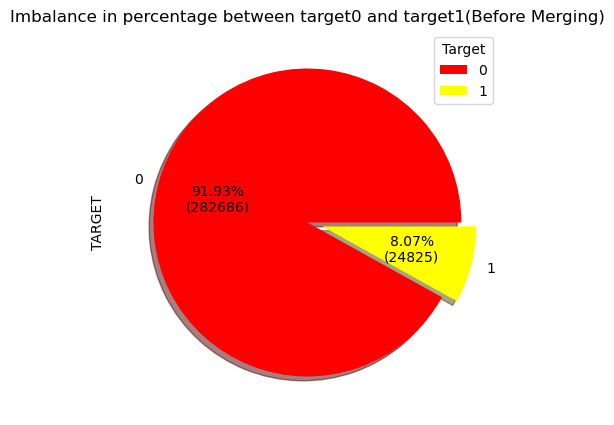

In [221]:
#Visualizing the Imbalance percentage for target0 and target1 using a pie plot 
tot = len(in1["TARGET"])
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, tot*x/100) 
#'{:.2f}%\n({:.0f})' is used to print both the percentage and value together on the wedges
plt.figure(figsize = [6, 5])
plt.title("Imbalance in percentage between target0 and target1(Before Merging)")
in1.TARGET.value_counts().plot.pie(autopct = my_fmt, colors = ["red", "yellow"], explode = [0, 0.1],shadow=True)
#autopct is used to display the percentage of share on the wedges of pie plot itself
plt.legend(title="Target")
plt.show()

#### Observation

From the above pie plot it is apparent that 8.07% of clients are clients with payment difficulties and 91.93% of clients are clients who fall under the 'all other cases' category.

#### Plotting graphs for customers with no payment difficulties(target0)

In [222]:
#creating a function for plotting countplot for a column (to reduce repetitive code)
def functionPlot(df, col, title, xtitle, ytitle, hue = None):
    sns.set_style("white")
    sns.set_context("notebook")    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue, palette='deep') 
    ax.set(xlabel = xtitle, ylabel = ytitle)    
    plt.show()

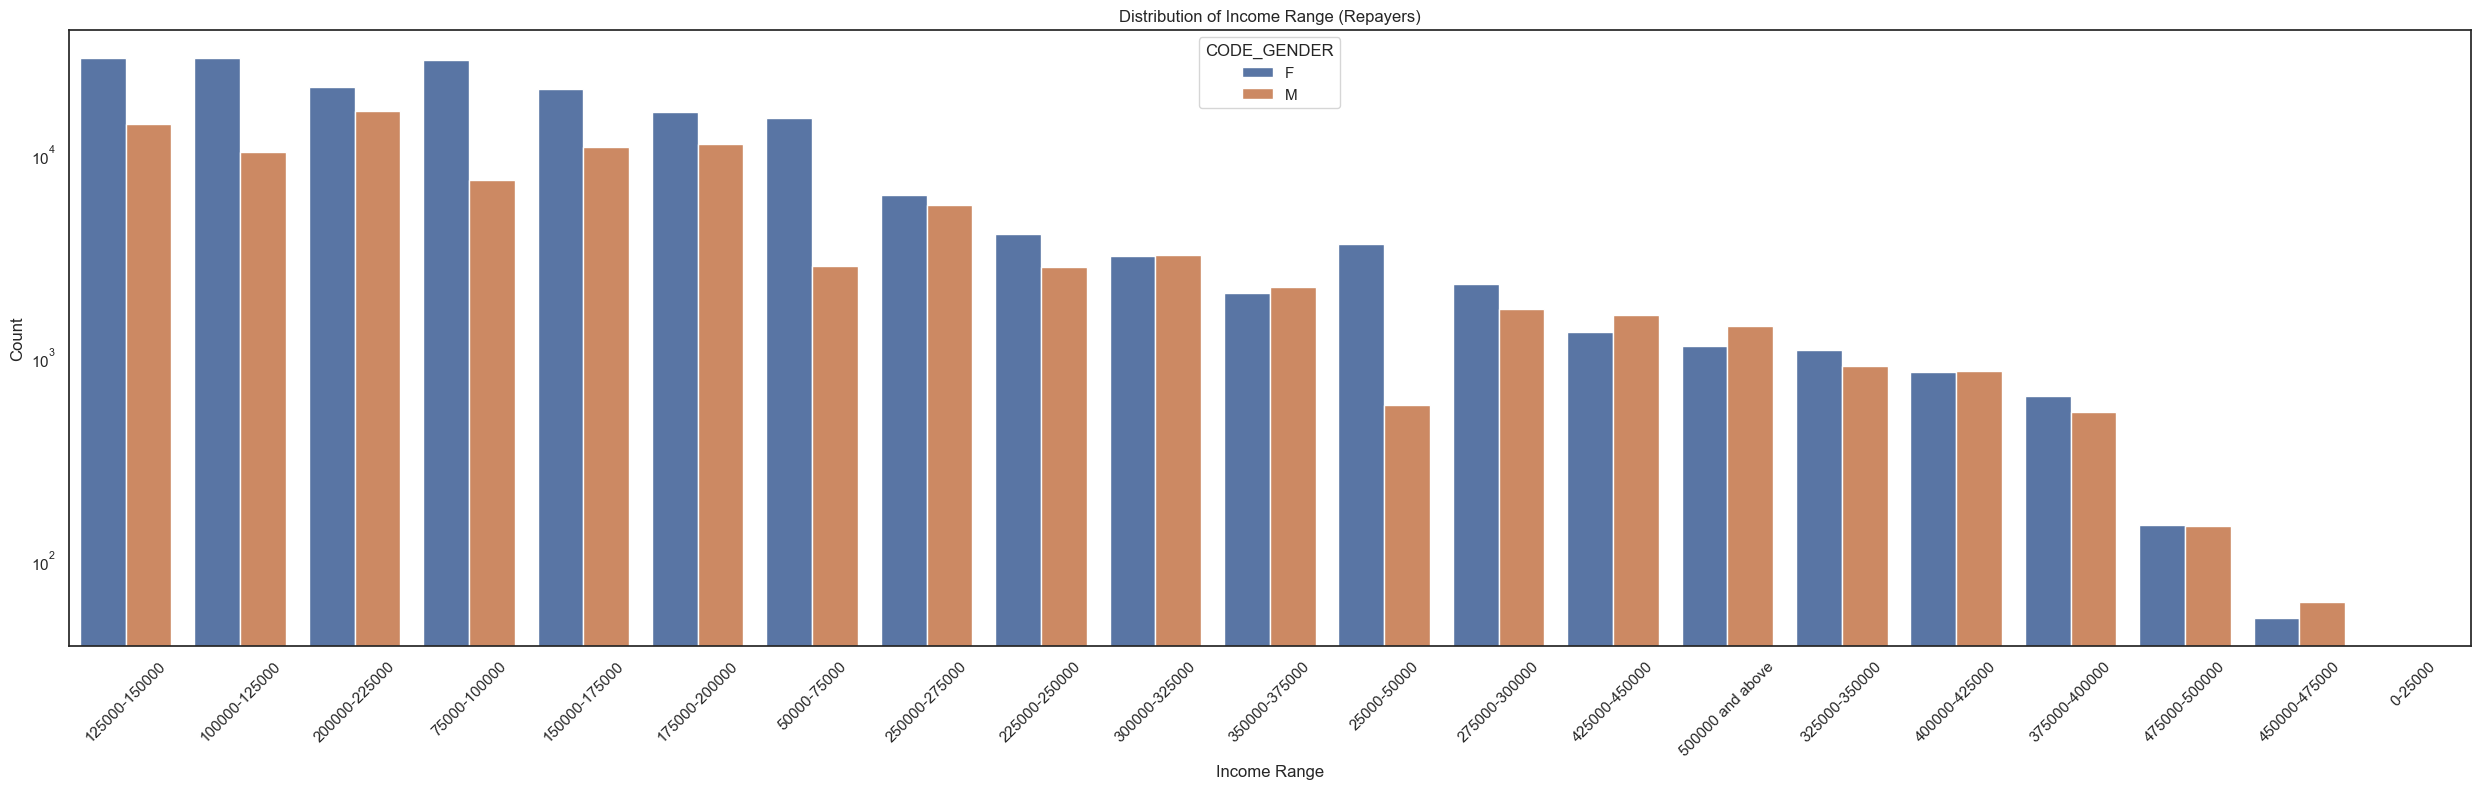

In [223]:
# Plotting for income range (AMT_INCOME_RANGE) and segregated based on gender using the functionPlot custom function
functionPlot(target0, col='AMT_INCOME_RANGE', title='Distribution of Income Range (Repayers)', hue='CODE_GENDER', xtitle = "Income Range", ytitle = "Count")

#### Observations

* In most of the cases female count is higher than male count.
* In ranges such as 400000-425000, 475000-500000 both the counts are almost equal.

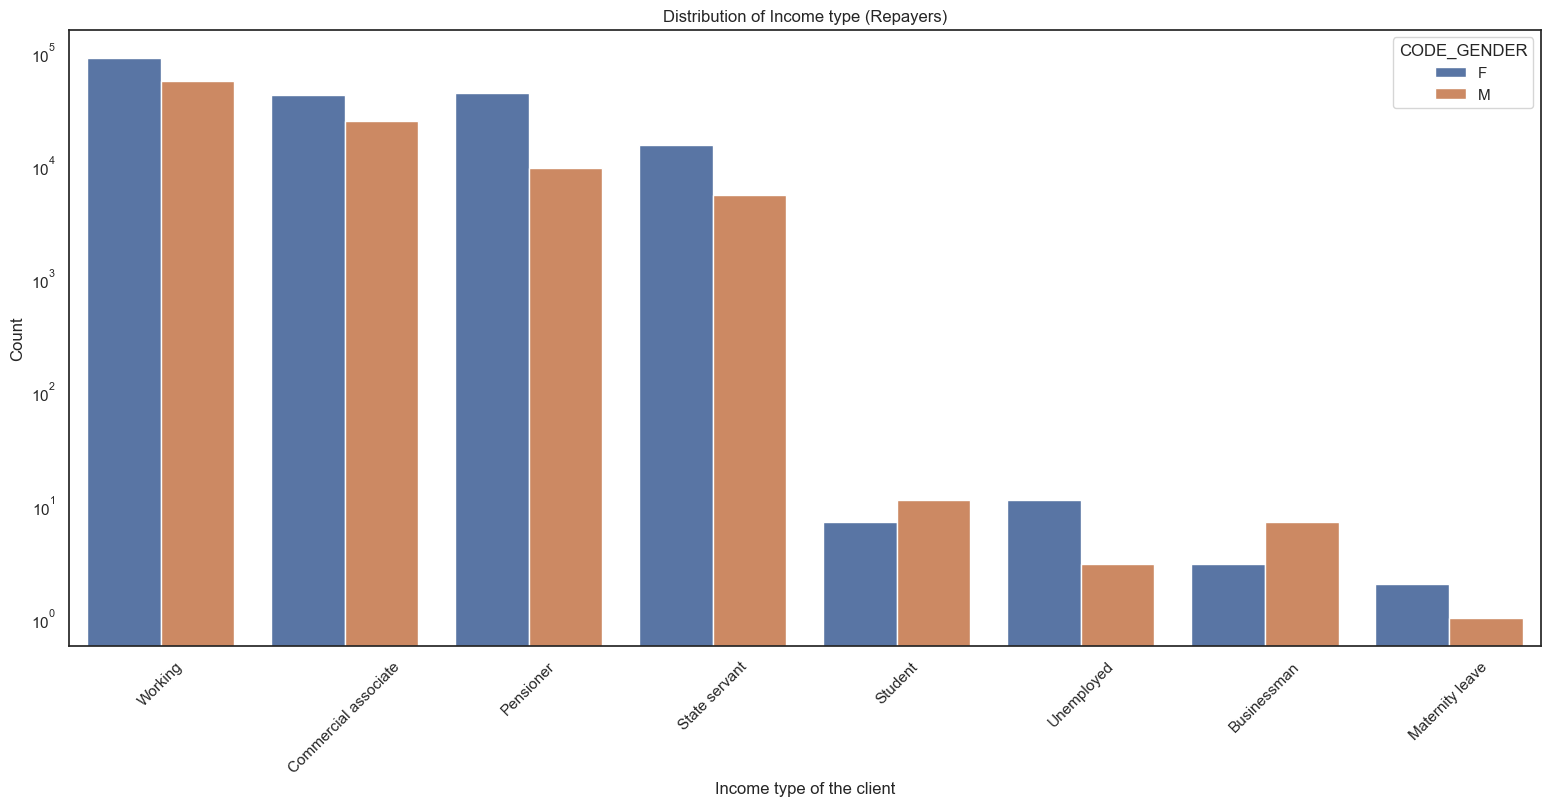

In [224]:
# Plotting for NAME_INCOME_TYPE column segregated by gender on countplot
functionPlot(target0, col='NAME_INCOME_TYPE', title='Distribution of Income type (Repayers)', hue='CODE_GENDER', xtitle = "Income type of the client", ytitle = "Count")

#### Observations

* Working people make up most of the clients.
* The count is very small for non working clients(Student, Unemployed, Maternity leave) when compared to clients who are working.
* Female clients are majority in most of the categories except Student and Businessman where male clients are dominant.

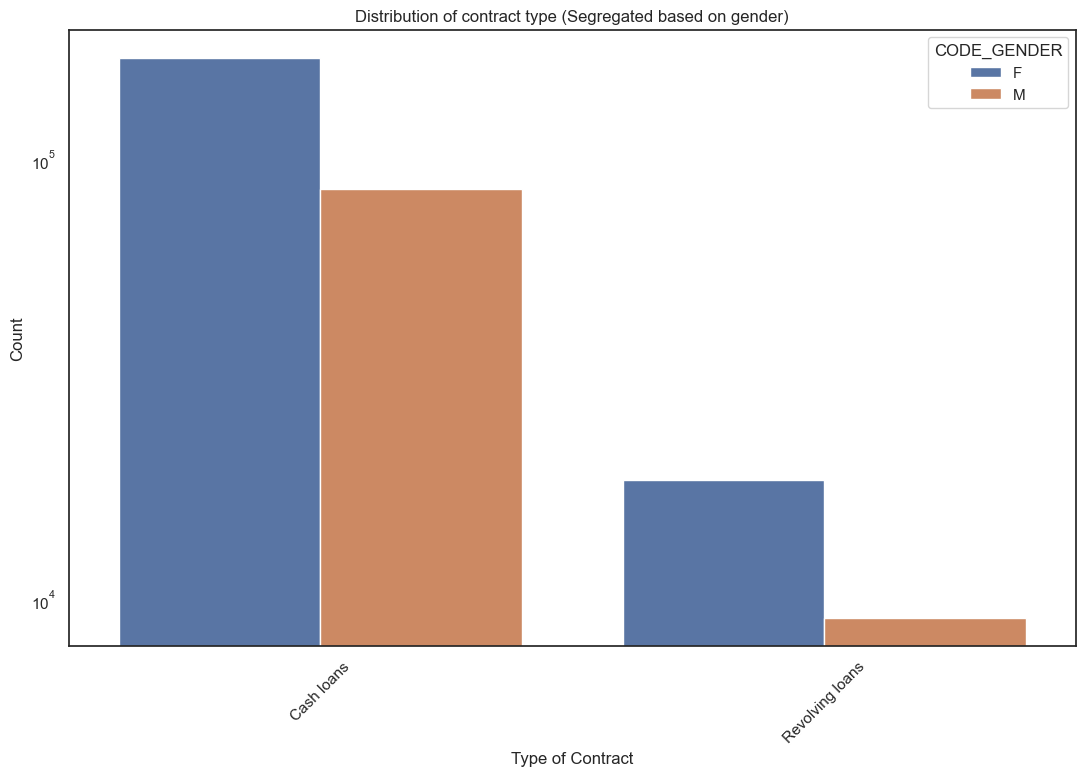

In [225]:
# Plotting for Contract NAME_CONTRACT_TYPE column segregated by gender on countplot
functionPlot(target0, col='NAME_CONTRACT_TYPE', title='Distribution of contract type (Segregated based on gender)', hue='CODE_GENDER', xtitle = "Type of Contract", ytitle = "Count")

#### Observations

* Clients both male and female prefer cash loans over revolving loans. 
* In both cases, female clients are more than male clients.

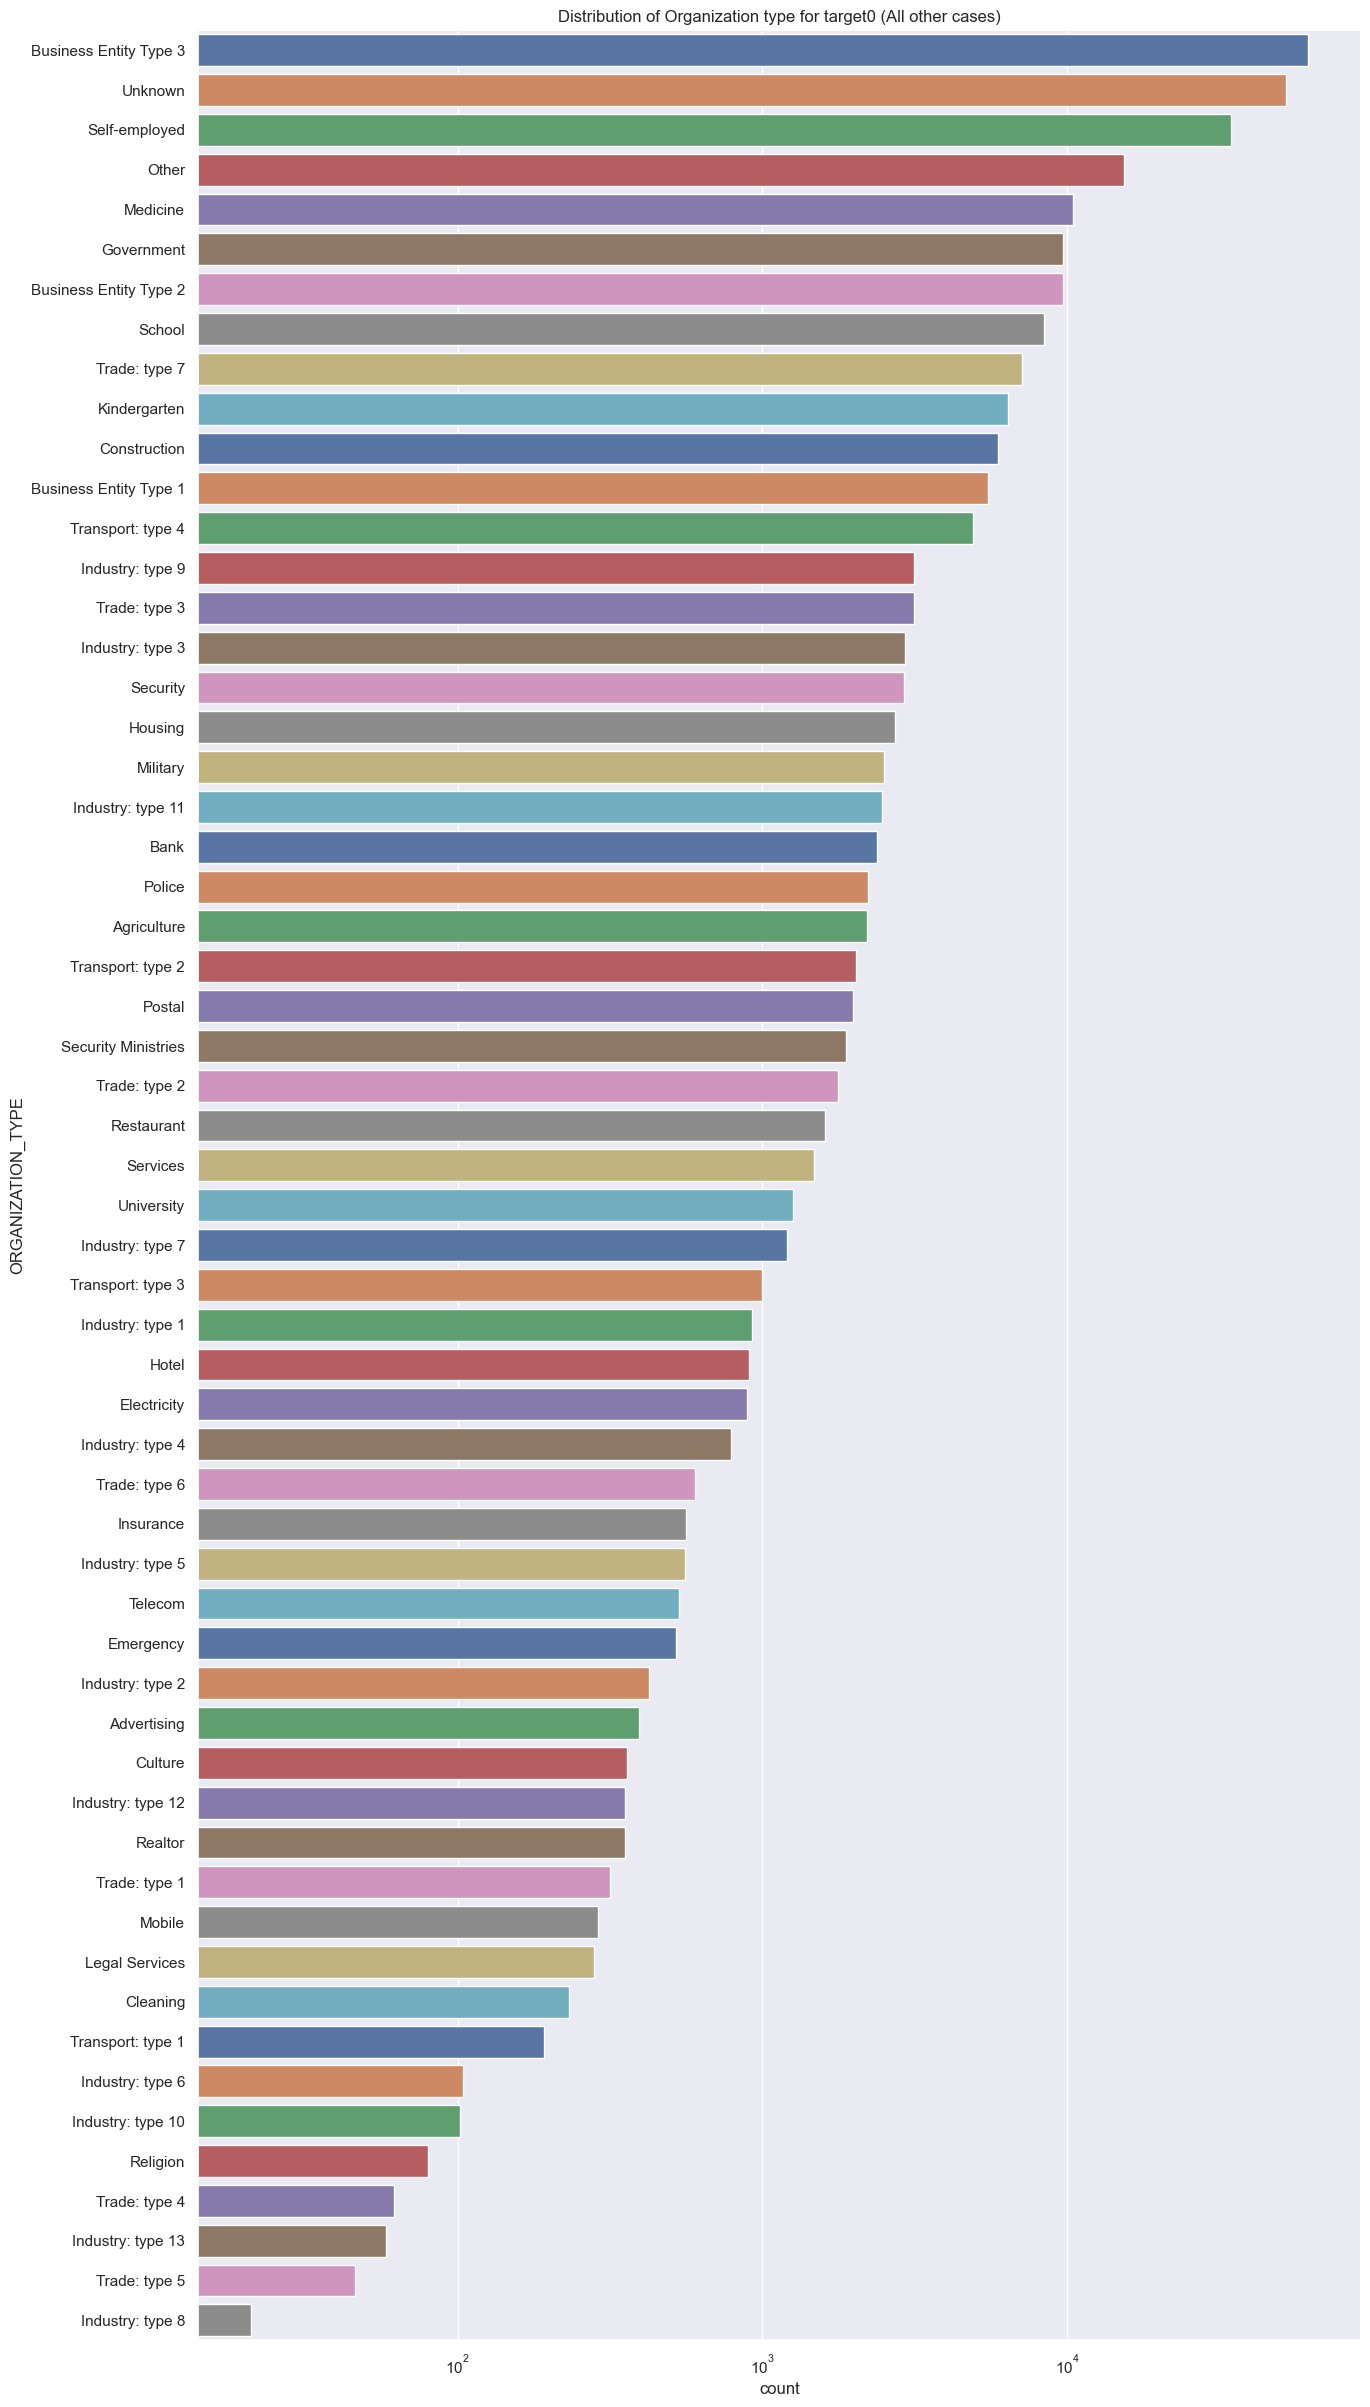

In [226]:
# Plotting for Organization_Type column in count plot
sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize = [15,30])
plt.title("Distribution of Organization type for target0 (All other cases)")
plt.xscale('log')
sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False).index, palette='deep')
plt.show()

#### Observations

* Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ ,'Unknown', ‘Self employed’, ‘Other’ , ‘Medicine’, ‘Government’ and 'Business entity type2'.
* Fewer clients are from Industries:type 8, Trade:type 5, Industry: type 13, Trade: type4, Religion, Industry type 10 and type 6.

#### Plotting graphs for Customers with payment difficulties (target1)

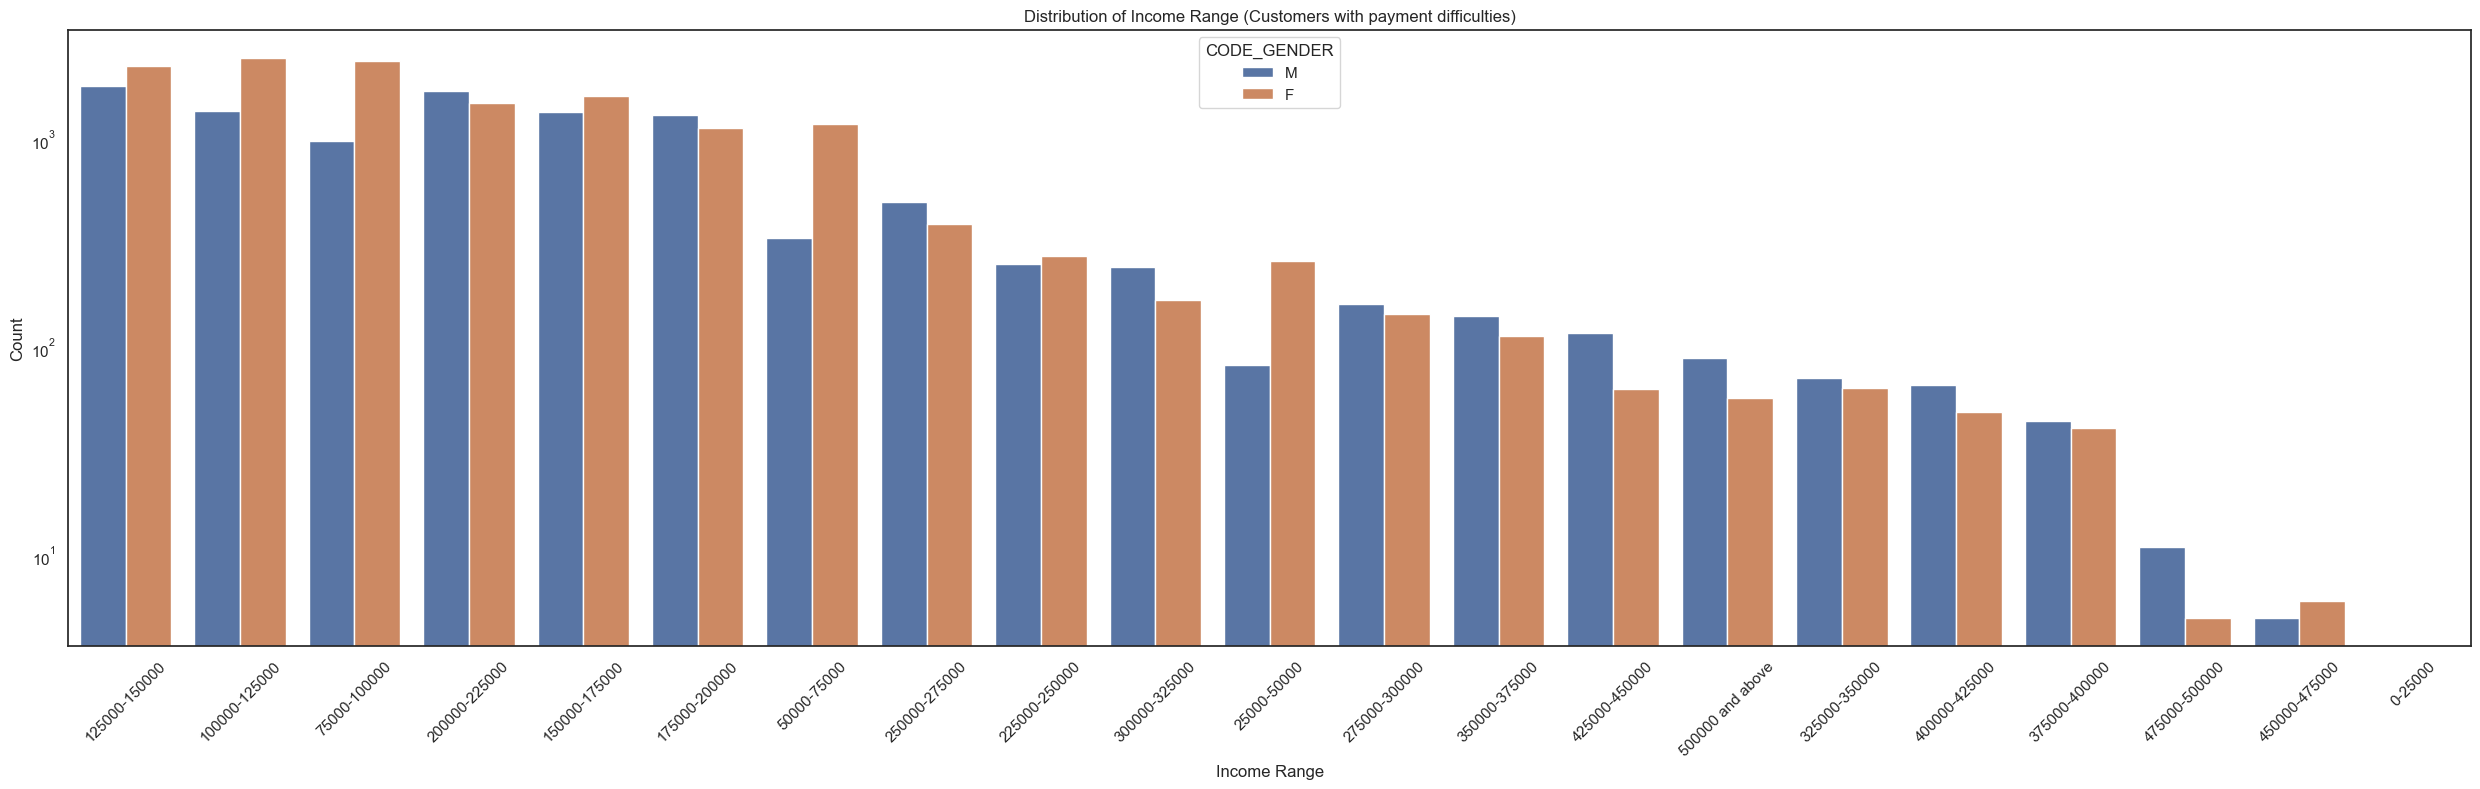

In [227]:
# Plotting for AMT_INCOME_RANGE column segregated by gender on countplot
functionPlot(target1, col='AMT_INCOME_RANGE', title='Distribution of Income Range (Customers with payment difficulties)', hue='CODE_GENDER', xtitle = "Income Range", ytitle = "Count")

#### Observations

* Income ranges from 100000 - 225000 has the highest count.
* Count is lowest from 350000 and its above values.

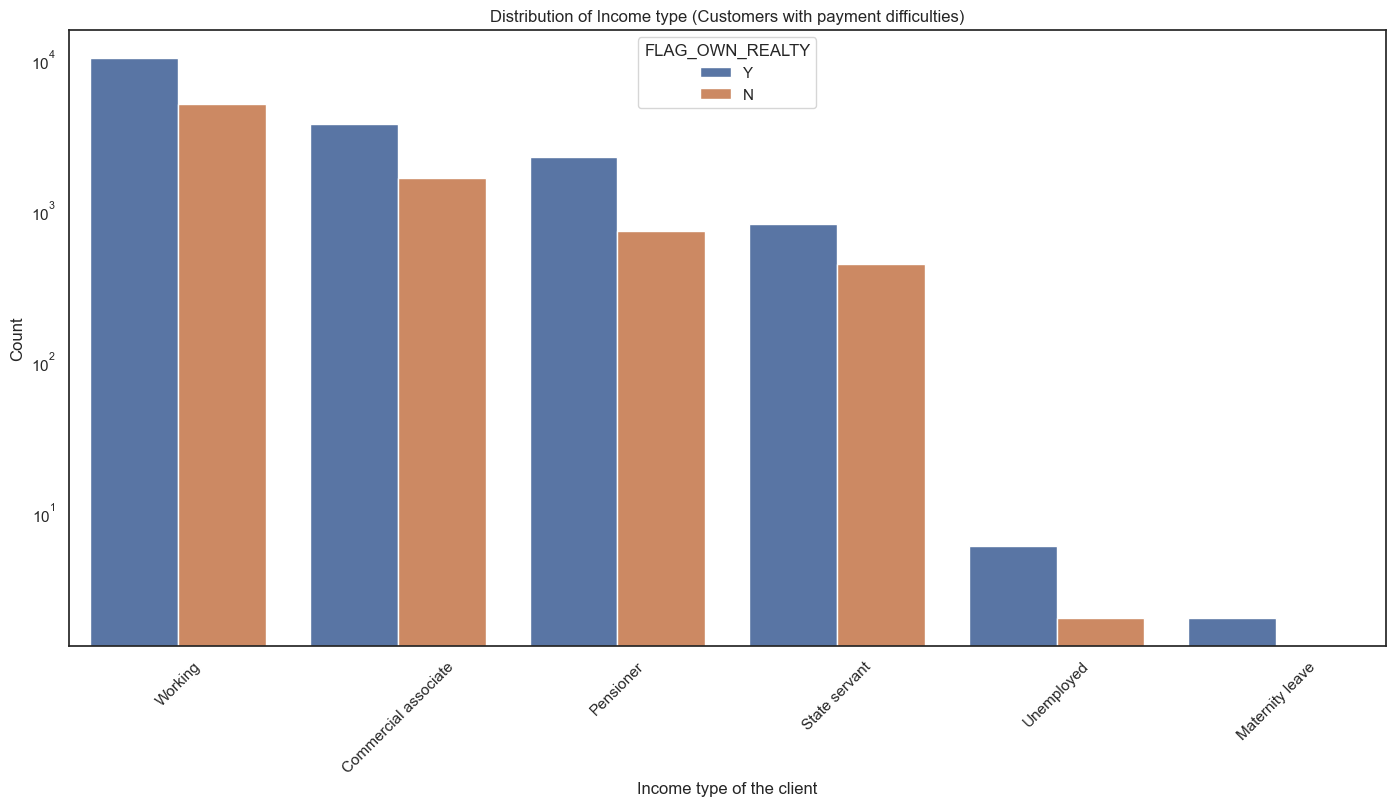

In [228]:
# Plotting for NAME_INCOME_TYPE column  segregated by FLAG_OWN_REALTY on countplot
functionPlot(target1, col='NAME_INCOME_TYPE', title='Distribution of Income type (Customers with payment difficulties)', hue='FLAG_OWN_REALTY', xtitle = "Income type of the client", ytitle = "Count")

#### Observations

* Obviously working clients have higher count and property.
* As we can see, majority of customers do have their own property but a large number of customers can be stated as otherwise.

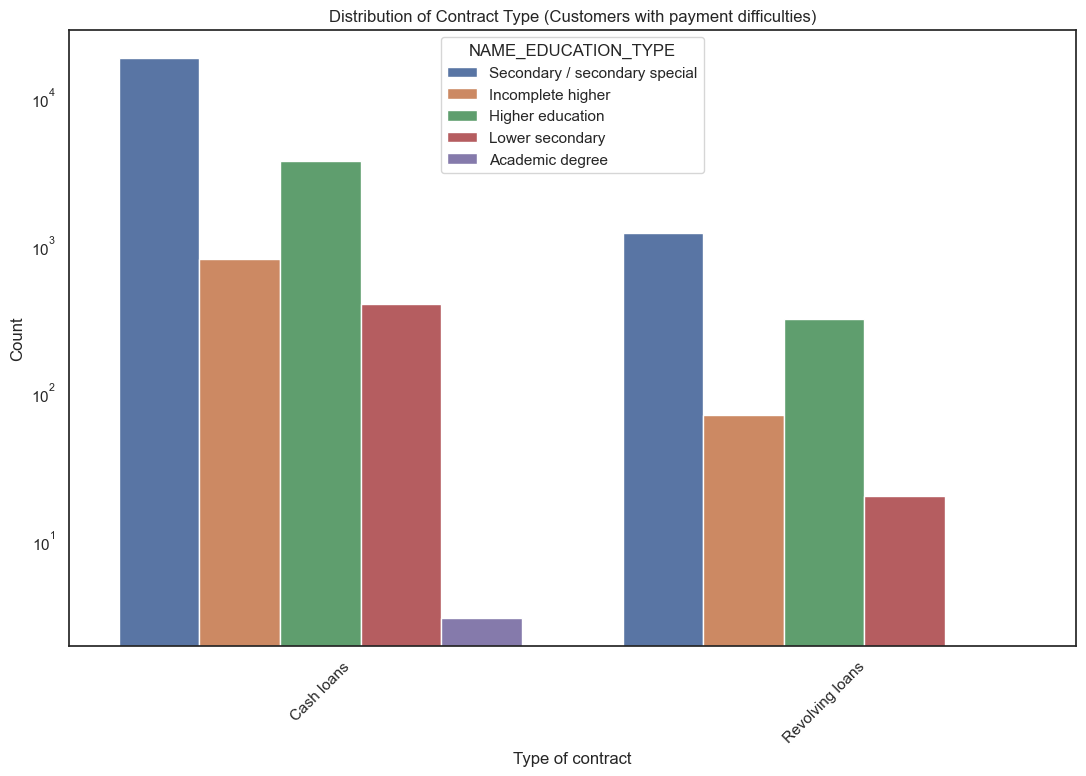

In [229]:
# Plotting for NAME_CONTRACT_TYPE column
functionPlot(target1, col='NAME_CONTRACT_TYPE', title='Distribution of Contract Type (Customers with payment difficulties)', hue='NAME_EDUCATION_TYPE', xtitle = "Type of contract", ytitle = "Count")

#### Observations

* Cash loans, as we can see, are preferred by clients of most of the education backgrounds in majority when compared to Revoloving loans.
* People with an academic degree do not prefer revolving loans at all.

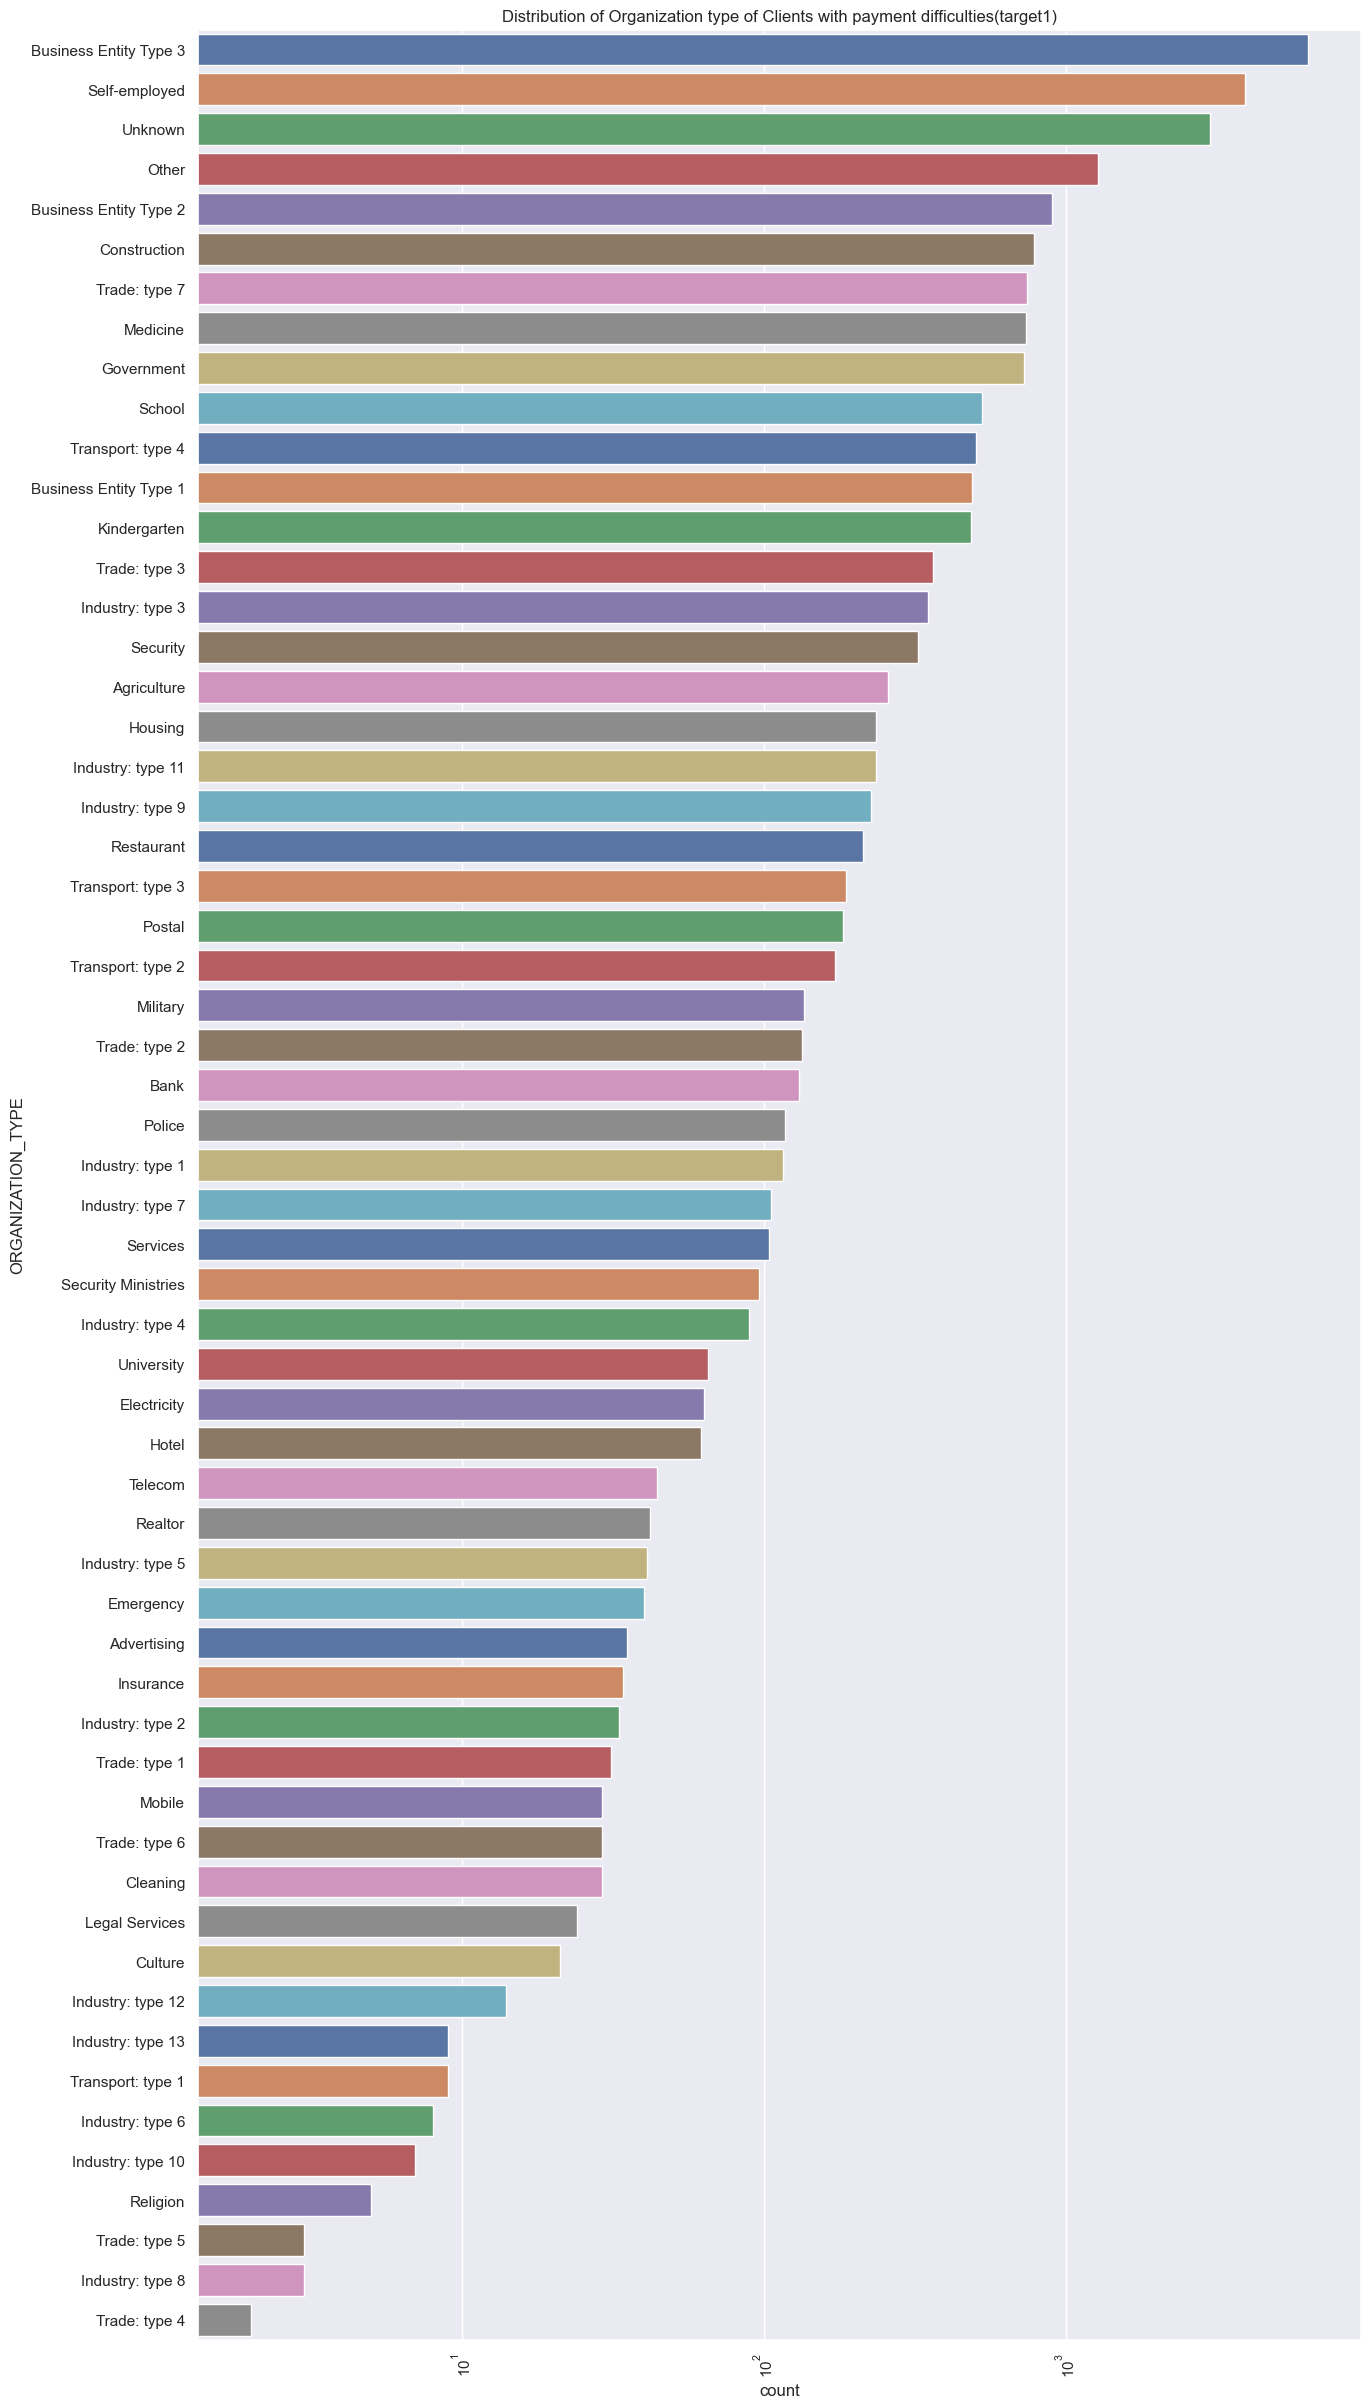

In [230]:
# Plotting for Organization type using countplot

sns.set_style('darkgrid')
sns.set_context('notebook')
plt.figure(figsize=(15,30))

plt.title("Distribution of Organization type of Clients with payment difficulties(target1)")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data = target1, y = 'ORGANIZATION_TYPE', order = target1['ORGANIZATION_TYPE'].value_counts().index, palette='deep')

plt.show()

#### Observations

* As compared to the target0 clients, clients with payment difficulties have the 'Business Entity Type 2' business type in the top 5 count replacing the 'medicine' business type.
* As compared to the target0 clients, clients with payment difficulties have the 'Industry type 10' business type in the least 5 count replacing the 'Industry type 13'.

In [231]:
#Separting the categorical columns and numerical columns
ob_dtypes = [i for i in in1.select_dtypes(include=np.object).columns if i not in ["type"] ]
nm_dtypes = [i for i in in1.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [232]:
#Printing categorical columns
for x in range(len(ob_dtypes)): 
    print(ob_dtypes[x])

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE


In [233]:
#Printing numerical columns
for x in range(len(nm_dtypes)): 
    print(nm_dtypes[x])

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR


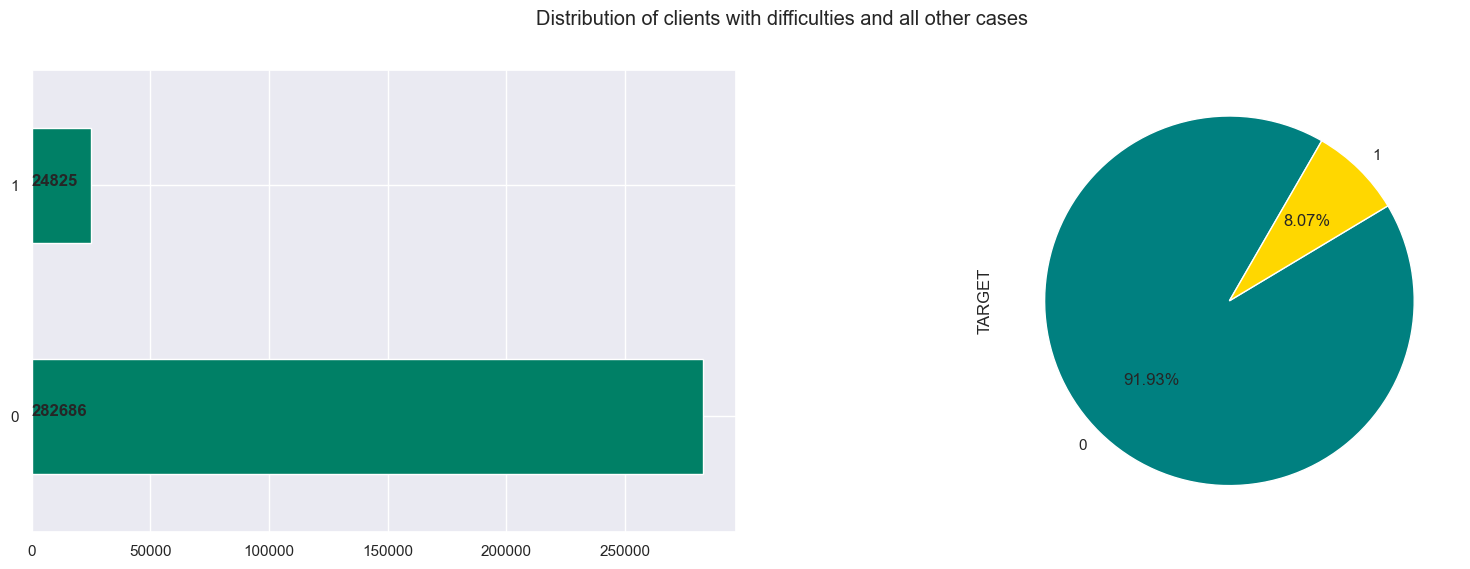

In [234]:
plt.figure(figsize = [20, 6])
plt.suptitle("Distribution of clients with difficulties and all other cases")
plt.subplot(1,2,1)
ax = in1["TARGET"].value_counts().plot(kind = "barh", colormap = "summer")
plt.subplot(1,2,2)
in1["TARGET"].value_counts().plot.pie(autopct = "%.2f%%", startangle = 60, colors = ["teal", "gold"])
for i,j in enumerate(in1["TARGET"].value_counts().values):
    ax.text(.7, i, j, weight = "bold")
plt.show()

#### Observation

   8.07% out of total client population have difficulty in repaying loan.

#### Merging both the datasets

In [235]:
#Joining the two data sets by a common column (SK_ID_CURR) for further comparison and analysis

data = pd.merge(in1, in2, on = 'SK_ID_CURR', how = 'inner')
data.sort_values(by = ['SK_ID_CURR','SK_ID_PREV'], ascending = [True, True], inplace = True)

In [236]:
data.shape

(1413701, 76)

In [237]:
#displaying combined dataset
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,9461,637,3648.00,2120,Laborers,1,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2,2,2,2,0.00,0.00,0.00,0.00,0.00,1.00,200000-225000,400000-450000,1038818,Consumer loans,9251.77,179055.00,179055.00,179055.00,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,Missing,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.00,low_normal,POS other with interest,365243.00,-565.00,125.00,-25.00,-17.00,0.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,Core staff,2,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,250000-275000,900000 and above,1810518,Cash loans,98356.99,900000.00,1035882.00,900000.00,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,low_normal,Cash X-Sell: low,365243.00,-716.00,-386.00,-536.00,-527.00,1.00
3,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,Core staff,2,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,250000-275000,900000 and above,2396755,Consumer loans,6737.31,68809.50,68053.50,68809.50,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.00,middle,POS household with interest,365243.00,-2310.00,-1980.00,-1980.00,-1976.00,1.00
2,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,16765,1188,1186.00,291,Core staff,2,MONDAY,11,0,0,0,0,0,0,School,1,0,1,0,0.00,0.00,0.00,0.00,0.00,0.00,250000-275000,900000 and above,2636178,Consumer loans,64567.67,337500.00,348637.50,337500.00,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.00,middle,POS industry with interest,365243.00,-797.00,-647.00,-647.00,-639.00,0.00
4,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,19046,225,4260.00,2531,Laborers,1,MONDAY,9,0,0,0,0,0,0,Government,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,50000-75000,0-150000,1564014,Consumer loans,5357.25,24282.00,2

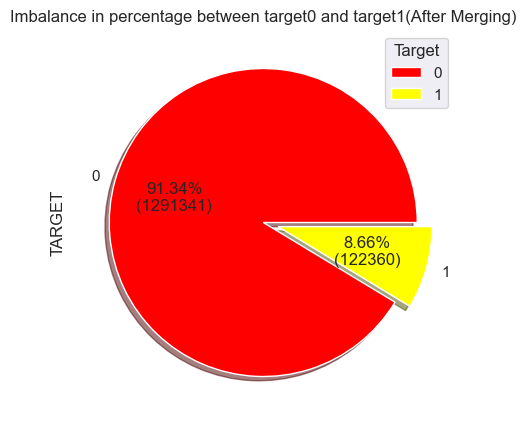

In [238]:
tot = len(data["TARGET"])
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, tot*x/100) 
#'{:.2f}%\n({:.0f})' is used to print both the percentage and value together on a wedge
plt.figure(figsize = [6, 5])
plt.title("Imbalance in percentage between target0 and target1(After Merging)")
data.TARGET.value_counts().plot.pie(autopct = my_fmt, colors = ["red", "yellow"], explode = [0, 0.1],shadow=True)
#autopct is used to display the percentage of share on the wedges of pie plot itself
plt.legend(title="Target")
plt.show()

#### Analysis of NAME_CONTRACT_TYPE in Combined Dataset

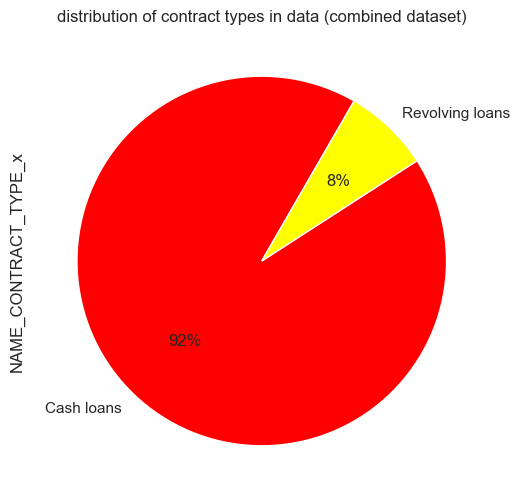

In [239]:
#Plotting for distribution of Contract type
plt.figure(figsize = [14, 6])
plt.title("distribution of contract types in data (combined dataset)")
data["NAME_CONTRACT_TYPE_x"].value_counts().plot.pie(autopct = "%1.0f%%", startangle = 60, colors = ["red", "yellow"])
plt.show()

#### Observation

The percentage of revolving loans and cash loans are 8% & 92% i.e. majority of clients choose cash loans over revolving loans.

#### Analysis of CODE_GENDER in the combined dataset

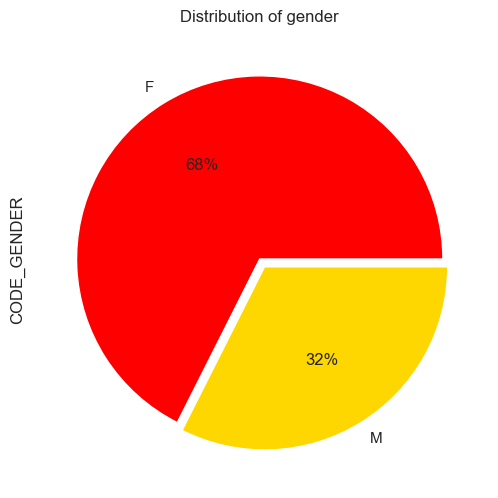

In [240]:
fig = plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
data["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%", colors = ["red", "gold"], explode = [0, 0.05])
plt.title("Distribution of gender")
plt.show()

#### Observation

We can infer that in that 68% has females and 32% of the data comparing to the application data it was 66% of females and 34% of males. 

#### Analysis of "NAME_CONTRACT_TYPE Vs TARGET

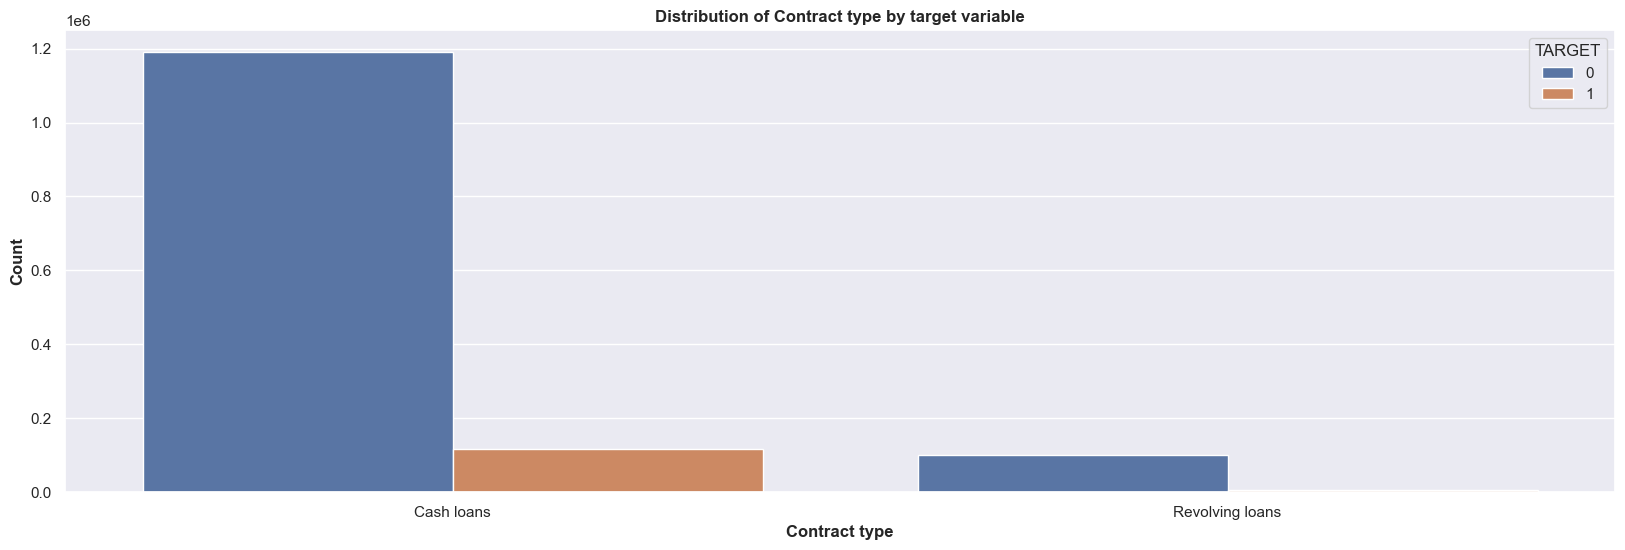

In [241]:
fig = plt.figure(figsize = [20, 6])
plt.title("Distribution of Contract type by target variable", weight = "bold")
sns.countplot("NAME_CONTRACT_TYPE_x", hue = "TARGET", data = data, palette="deep")
plt.xlabel("Contract type", weight = "bold")
plt.ylabel("Count", weight = "bold")
plt.show()

#### Observation

* Both set of clients (Target 0 and target 1) prefer cash loans over revolving loans.
* Target 1 clients doesnt prefer Revolving loans at all.

#### Analysis of CODE_GENDER by TARGET

In [ ]:
fig = plt.figure(figsize = [20, 6])
plt.title("Distribution of Gender by target variable", weight = "bold")
sns.countplot("CODE_GENDER", hue = "TARGET", data = data, palette="deep")
plt.xlabel("Contract type", weight = "bold")
plt.ylabel("Count", weight = "bold")
plt.show()

#### Observations

* Female clients are far better repayers of loan.
* Number of people who have repayment difficulties in both genders are almost equal.

#### Analysis of FLAG_OWN_CAR(Flag if the client owns a car) vs Target

In [ ]:
fig = plt.figure(figsize = [15,6])
explode = (0, 0.1)
plt.subplot(1,2,1)
plt.title("Distribution of client by car ownership", weight = "bold")
data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%", colors=["teal", "gold"], explode = explode, startangle = 60)
plt.subplot(1,2,2)
plt.title("Distribution of client by car ownership based on repayment status", weight = "bold")
data[data["FLAG_OWN_CAR"] == "Y"]["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%", colors=["brown","grey"], explode = explode)
plt.show()

#### Observations

* Only 34% of clients own a car .
* Only 8% of clients who own a car have difficulty in payments.

#### Analysis of CNT_CHILDREN(Number of children the client has) and CNT_FAM_MEMBERS(How many family members does client have) of client by repayment status

In [ ]:
fig = plt.figure(figsize= [12, 15])
plt.subplot(2,1,1)
plt.title(" Distribution of Number of children client has  by repayment status", weight = "bold")
ax = sns.countplot(data["CNT_CHILDREN"], hue = data["TARGET"])
ax.set(xlabel = "Number of Children", ylabel = "Count of Clients")
plt.legend(loc = "right")
plt.subplot(2,1,2)
plt.title(" Distribution of Number of family members client has  by repayment status", weight = "bold")
ax = sns.countplot(data["CNT_FAM_MEMBERS"], hue = data["TARGET"])
ax.set(xlabel = "Number of Family Members", ylabel = "Count of Clients")
plt.legend(loc = "right")
plt.show()

#### Observations

Subplot1:

* The majority as per both cases of repayment status, have zero children.
* Clients with more than 2 children do not have difficulty in making payments.
* Clients with 0 children have the majority in terms of having difficulty in making payments.

Subplot2:

* Clients with 2 family members living together are in high numbers as per both cases of repayment status
* Also, from point 1, the majority of clients having difficulty in payments have 2 family members

#### Analysis of NAME_TYPE_SUITE(Who was accompanying client when he was applying for the loan)

In [ ]:
plt.figure(figsize = [18, 12])

plt.subplot(1,2,1)
plt.title("Distribution of Suite type", weight = "bold")
ax = sns.countplot(y = data["NAME_TYPE_SUITE_y"], palette = "deep", order = data["NAME_TYPE_SUITE_y"].value_counts().index[:5])
ax.set(xlabel = "Count", ylabel = "Who accompanied Client")

plt.subplot(1,2,2)
plt.title("Distribution of Suite type by target (repayment status)", weight = "bold")
ax = sns.countplot(y = data["NAME_TYPE_SUITE_y"], palette="deep", hue=data["TARGET"], order = data["NAME_TYPE_SUITE_y"].value_counts().index[:5])
ax.set(xlabel = "Count", ylabel = "")
plt.legend(loc = "right")

plt.show()

#### Observartions

* Majority of the clients are unaccompanied.
* Least amount of clients are in the company of their children.

#### Analysis of NAME_INCOME_TYPE( Client's income type)

In [ ]:
plt.figure(figsize = [22, 8])
plt.subplot(1,2,1)
plt.title("Distribution of client income type",  weight = "bold")
ax = sns.countplot(y = data["NAME_INCOME_TYPE"], palette = "deep", order = data["NAME_INCOME_TYPE"].value_counts().index[:4])
ax.set(xlabel = "Count", ylabel = "Income Type")
plt.subplot(1,2,2)
plt.title("Distribution of client income  type by target (repayment status)",  weight = "bold")
ax = sns.countplot(y = data["NAME_INCOME_TYPE"],  hue = data["TARGET"], palette="deep", order = data["NAME_INCOME_TYPE"].value_counts().index[:4])
ax.set(xlabel = "Count", ylabel = "")
plt.show()

#### Observations

* Most clients as per both cases of repayment status, are working.
* Conversely, the least amount of clients are pensioners (retired clients)

#### Analysis of NAME_EDUCATION_TYPE(Education type) Vs Target

In [ ]:
#NAME_EDUCATION_TYPE: Level of education the client
explode = [0, 0.05, 0.08, 0.08, 0.08]
plt.figure(figsize = [20, 8])
plt.subplot(1,2,1)
plt.title("Distribution of Education for Repayers",  weight = "bold")
data[data["TARGET"] == 0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12, autopct = "%1.0f%%", explode = explode)
plt.subplot(1,2,2)
plt.title("Distribution of Education for Defaulters",  weight = "bold")
data[data["TARGET"] == 1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12, autopct = "%1.0f%%", explode = explode)
plt.show()

#### Observations

* Clients who default are proportionally 7% higher compared to clients who do not default (for clients with education as secondary).
* In the higher education category, clients who default are 8% fewer.
* In both cases of repayment status, lower secondary and academic degree categories are the minority.

#### Analysis of NAME_INCOME_TYPE(Clients income type (businessman, working, maternity leave,…) vs Target

In [ ]:
#creating a dataframe grouped by the desired columns
data2 = data.groupby(['TARGET','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL', ascending = False)
fig = plt.figure(figsize = [16, 8])

ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL', data = data2, hue='TARGET', palette = "deep")
plt.title("Average Earnings by Profession (Grouped by repayment status)", weight = "bold")

plt.xlabel("Profession of the client", weight = "bold")
plt.ylabel("Income", rotation = 0, weight = "bold")
plt.show()

#### Observations

* In both cases of repayment status, commerical associate clients are the highest earners.
* Clients who are on maternity leave and unemployed have difficulty in making payments
* Pensioners and students do not have any difficulties in repayments.
* There are almost an equal number of clients under the working category who repay and default.

#### Analysis of NAME_FAMILY_STATUS(Family status of the client) vs Target

In [ ]:
#NAME_FAMILY_STATUS - Family status of the client

plt.figure(figsize = [16, 8])
plt.subplot(1,2,1)
plt.title("Distribution of Family status for Repayers (Target0)",  weight = "bold")
data[data["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%")

plt.subplot(1,2,2)
plt.title("Distribution of Family status for Defaulters (Target1)", weight = "bold")
data[data["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%")

plt.show()

#### Observations

* There's a difference of 3% in married clients who have difficulty in making payments.
* Family status for both cases of repayment status have an almost evenly distributed family status.

#### Analysis of NAME_HOUSING_TYPE(Housing type) vs AMT_CREDIT(Credit amount)

In [ ]:
# Box plotting for Credit amount and Housing type (Segregated by repyament status (Target))

plt.figure(figsize = [16,12])
plt.title('Credit amount vs Housing type',  weight = "bold")

sns.barplot(data = data, x = 'NAME_HOUSING_TYPE', y = 'AMT_CREDIT_x', hue = 'TARGET', palette = "deep")
plt.xticks(rotation = 0)

plt.xlabel("Housing type", weight = "bold")
plt.ylabel("Credit Amount", weight = "bold", rotation = 0)

plt.show()

#### Observations

* Clients with office, house/apartment, municipal aparments have the highest repayers.
* Clients living with parents or in a parents' aparment have the least amount of repayers and defaulters.

#### Analysis of NAME_CASH_LOAN_PURPOSE(Purpose of the cash loan) Vs Target

In [ ]:
#Using log scale for distribution
sns.set_style('dark')
sns.set_context('notebook')

plt.figure(figsize = [15, 30])
plt.xscale('log')
plt.title('Distribution of purposes with target (Repayment status)',  weight = "bold")

ax = sns.countplot(data = data, y = 'NAME_CASH_LOAN_PURPOSE', order = data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'TARGET', palette = 'deep') 
plt.ylabel("Purpose of Loan", weight = "bold")
plt.xlabel("Count", weight = "bold")

plt.legend(loc = "right")
plt.show()

#### Observation

* Repair purposes are on top with most defaulters and repayers.

#### Analysis of NAME_CASH_LOAN_PURPOSE(Purpose of the cash loan) Vs NAME_CONTRACT_STATUS(Contract status (approved, cancelled, ...) of previous application)

In [ ]:
sns.set_style('dark')
sns.set_context('notebook')
plt.figure(figsize = [15, 30])
plt.xscale('log')
plt.title('Distribution of purposes with target (Repayment status)',  weight = "bold")
ax = sns.countplot(data = data, y = 'NAME_CASH_LOAN_PURPOSE', order = data['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue = 'NAME_CONTRACT_STATUS', palette = 'deep') 
plt.ylabel("Purpose of Loan", weight = "bold")
plt.xlabel("Count", weight = "bold")
plt.show()

#### Observations

* Most rejection and approval of loans is when the purpose of the client is based on Repairs.
* For education purposes we have equal number of approvals and refusals.

#### Top 10 Correlation Variables

In [ ]:
repayerData = data[data['TARGET'] == 0]
defaulterData = data[data['TARGET'] == 1]

In [ ]:
#to find the most correlated columns (positive and negative)
repayerData.corr().unstack().sort_values(ascending = False).drop_duplicates()

##### From the above output, the top10 correlated columns are: 


OBS_30_CNT_SOCIAL_CIRCLE ,    OBS_60_CNT_SOCIAL_CIRCLE       1.00

AMT_GOODS_PRICE_y      ,      AMT_APPLICATION                0.99

AMT_CREDIT_x    ,             AMT_GOODS_PRICE_x              0.99

AMT_CREDIT_y       ,          AMT_APPLICATION                0.98

DAYS_LAST_DUE       ,         DAYS_TERMINATION               0.93

CNT_FAM_MEMBERS      ,        CNT_CHILDREN                   0.88

LIVE_REGION_NOT_WORK_REGION , REG_REGION_NOT_WORK_REGION     0.88

DEF_60_CNT_SOCIAL_CIRCLE  ,   DEF_30_CNT_SOCIAL_CIRCLE       0.86

REG_CITY_NOT_WORK_CITY    ,   LIVE_CITY_NOT_WORK_CITY       0.84

AMT_GOODS_PRICE_x        ,    AMT_ANNUITY_x                  0.76


In [ ]:
#making a dataframe with only the columns with high correlation
top10_CorrTarget0= repayerData[["OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE", "AMT_GOODS_PRICE_y","AMT_APPLICATION","AMT_CREDIT_x", "AMT_GOODS_PRICE_x", "AMT_CREDIT_y","DAYS_LAST_DUE", "DAYS_TERMINATION","CNT_FAM_MEMBERS", "CNT_CHILDREN","LIVE_REGION_NOT_WORK_REGION" ,"REG_REGION_NOT_WORK_REGION","DEF_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE","REG_CITY_NOT_WORK_CITY", "LIVE_CITY_NOT_WORK_CITY" , "AMT_ANNUITY_x" ]].copy()

In [ ]:
top10_CorrTarget0.shape

In [ ]:
#Visually showcasing the top10 correlated columns through a heatmap
corr_target0 = top10_CorrTarget0.corr()
plt.figure(figsize = [15, 15])
sns.heatmap(data = corr_target0, cmap="Blues", annot=True)
plt.show()

#### Observations

* AMT_APPLICATION and AMT_GOODS_PRICE have high correlation i.e goods price of good that client asked for (if applicable) on the previous application is directly proportional to the credit the client ask on the previous application.
* If the client's contact address does not match the work address, then there's a high chance that the client's permanent address also does not match the work address.
* DAYS_TERMINATION is higly correlated to DAYS_LAST_DUE i.e application date of current application when was the expected termination of the previous application is higly correlated to application date of current application when was the last due date of the previous application.
* A client with children is higly likely to have family members as well because CNT_FAM_MEMBERS is directly proportional to CNT_CHILDREN.

In [ ]:
defaulterData.corr().unstack().sort_values(ascending = False).drop_duplicates()

##### From the above output, the top10 correlated columns are: 

OBS_60_CNT_SOCIAL_CIRCLE,     OBS_30_CNT_SOCIAL_CIRCLE       1.00

AMT_GOODS_PRICE_y  ,         AMT_APPLICATION                0.99

AMT_GOODS_PRICE_x ,           AMT_CREDIT_x                   0.98

AMT_APPLICATION   ,           AMT_CREDIT_y                   0.98

AMT_GOODS_PRICE_y   ,         AMT_CREDIT_y                   0.97

DAYS_TERMINATION    ,         DAYS_LAST_DUE                  0.95

CNT_FAM_MEMBERS     ,         CNT_CHILDREN                   0.89

LIVE_REGION_NOT_WORK_REGION  ,REG_REGION_NOT_WORK_REGION     0.87

DEF_60_CNT_SOCIAL_CIRCLE   ,  DEF_30_CNT_SOCIAL_CIRCLE       0.86

REG_CITY_NOT_WORK_CITY    ,   LIVE_CITY_NOT_WORK_CITY        0.79

In [ ]:
#Adding the top10 correlated columns into a new dataframe:

top10_CorrTarget1 = data[["OBS_60_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE","AMT_GOODS_PRICE_y" ,"AMT_APPLICATION","AMT_GOODS_PRICE_x" , "AMT_CREDIT_x" , "AMT_CREDIT_y" ,"DAYS_TERMINATION" , "DAYS_LAST_DUE","CNT_FAM_MEMBERS" , "CNT_CHILDREN","LIVE_REGION_NOT_WORK_REGION" ,"REG_REGION_NOT_WORK_REGION","DEF_60_CNT_SOCIAL_CIRCLE" , "DEF_30_CNT_SOCIAL_CIRCLE","REG_CITY_NOT_WORK_CITY" , "LIVE_CITY_NOT_WORK_CITY" ]]

In [ ]:
#Plotting heat map for for all 10 correlated columns
corr_target1 = top10_CorrTarget1.corr()
plt.figure(figsize = [15, 15])
sns.heatmap(data = corr_target1, cmap="Blues", annot=True)
plt.show()

#### Observations

* AMT_GOODS_PRICE and AMT_APPLICATION have a higher correlation.
* If the client's contact address does not match the work address, then there's a high chance that the client's permanent address also does not match the work address.
* Higher the goods price, higher the credit by the client.
* CNT_CHILDREN and CNT_FAM_MEMBERS are highly correlated which means a client with children is highly likely to have family members as well.

### Inference